In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import scipy.stats as stats 
import pandas as pd
import numpy as np
from operator import itemgetter

In [2]:
import matplotlib
matplotlib.use('nbagg')

In [3]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10
plt.rc("font", size=23)


plt.rc('xtick', color='k', labelsize='medium', direction='in')
plt.rc('xtick.major', size=8, pad=12)
plt.rc('xtick.minor', size=8, pad=12)

plt.rc('ytick', color='k', labelsize='medium', direction='in')
plt.rc('ytick.major', size=8, pad=12)
plt.rc('ytick.minor', size=8, pad=12)

# Convention and definition of the problem for linear model

The problem we are interested in is the following:

We measured a bunch of variables per individual, for many individuals i. We are interested in the relationship between one of this variable that we will call the *response variable* ($Y_i$) and the other variables that we will call *covariables* ($\pmb X_i$). $\pmb X_i$ here is in bold because it is a matrix of shape (1,j) where j is the number of covariables we consider. If we agregate for all the individual then ($\pmb X$) is of shape (i,j). 

We will consider our response variable to be a random variable and as a random variable we will write it $\pmb Y_i$. $y_i$ a realization of  $\pmb Y_i$. If we agregate for all individuals ($\pmb Y$) is of shape (i,1) and is a matrix containing the realization of $y_i$.

Of course our measurments are not perfect so there is some noise associated to it ($\epsilon$) : this why we decided to consider our response variable as a random variable. In mathematical term we are interested in a class of problem that we can write as :

$$\pmb{Y_i}=f(\pmb{X_i})+\epsilon$$

The function $f$ is called the regression function, and today we will be interested in looking at a particular form of those function: **linear combination**.

A particular case of linear combination would be a single covariable with an intercept like :

$$y_i=\beta x_i+c$$

A more general case would have more covariables and would be written like:

$$f(\textbf{X}_i,\pmb{\beta})=\sum_{j} \beta_j x_{i,j}= \textbf{X}_{i}^{T}\pmb{\beta}$$

Where *$X_i$* is a vector of j covariables associated to point individual i.

Note that for now nothing is said about the nature of the $x_{i,j}$, for example some could be constant instead of being a variable and thus you could go back to a more specific affine function (like $\beta x+c$).

Let's illustrate that with a data set. Let's look at this diabetes dataset which contains a set a physiological measurement as well as the disease progression, per patient and for many patients.

In [311]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In this case our covariable matrix $\pmb X$ is :

In [312]:
covar=pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
covar.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


where a line representes a patient, and a column is a covariable.


Correspondingly the response variable we are interested in is the disease progression:

In [313]:
response=pd.DataFrame(diabetes['target'],columns=['disease progression'])
response.head()

,disease progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


We are interested in finding a set of $\pmb \beta$ so that:

$$disease progression_0=\beta_1 age_0 + \beta_2 sex_0+\beta_3 bmi_0+\beta_4 bp_0+\beta_5 s1_0 +\beta_6 s2_0 + \beta_7 s3_0+\beta_8 s4_0+\beta_9 s5_0+\beta_10 s6_0+\beta_0$$

$$disease progression_1=\beta_1 age_1 + \beta_2 sex_1+\beta_3 bmi_1+\beta_4 bp_1+\beta_5 s1_1 +\beta_6 s2_1 + \beta_7 s3_1+\beta_8 s4_1+\beta_9 s5_1+\beta_10 s6_1+\beta_0$$

$$......$$

$$disease progression_n=\beta_1 age_n + \beta_2 sex_n+\beta_3 bmi_n+\beta_4 bp_n+\beta_5 s1_n+\beta_6 s2_n + \beta_7 s3_n+\beta_8 s4_n+\beta_9 s5_n+\beta_10 s6_n+\beta_0$$

Let's say we were only interest in bmi (Body Mass Index) to predict disease progression. Then the kind of outcome we want of this analysis is our ability  to understand the data linearly like that, which can be sumurarized by our ability to produce this kind of plots:

<IPython.core.display.Javascript object>


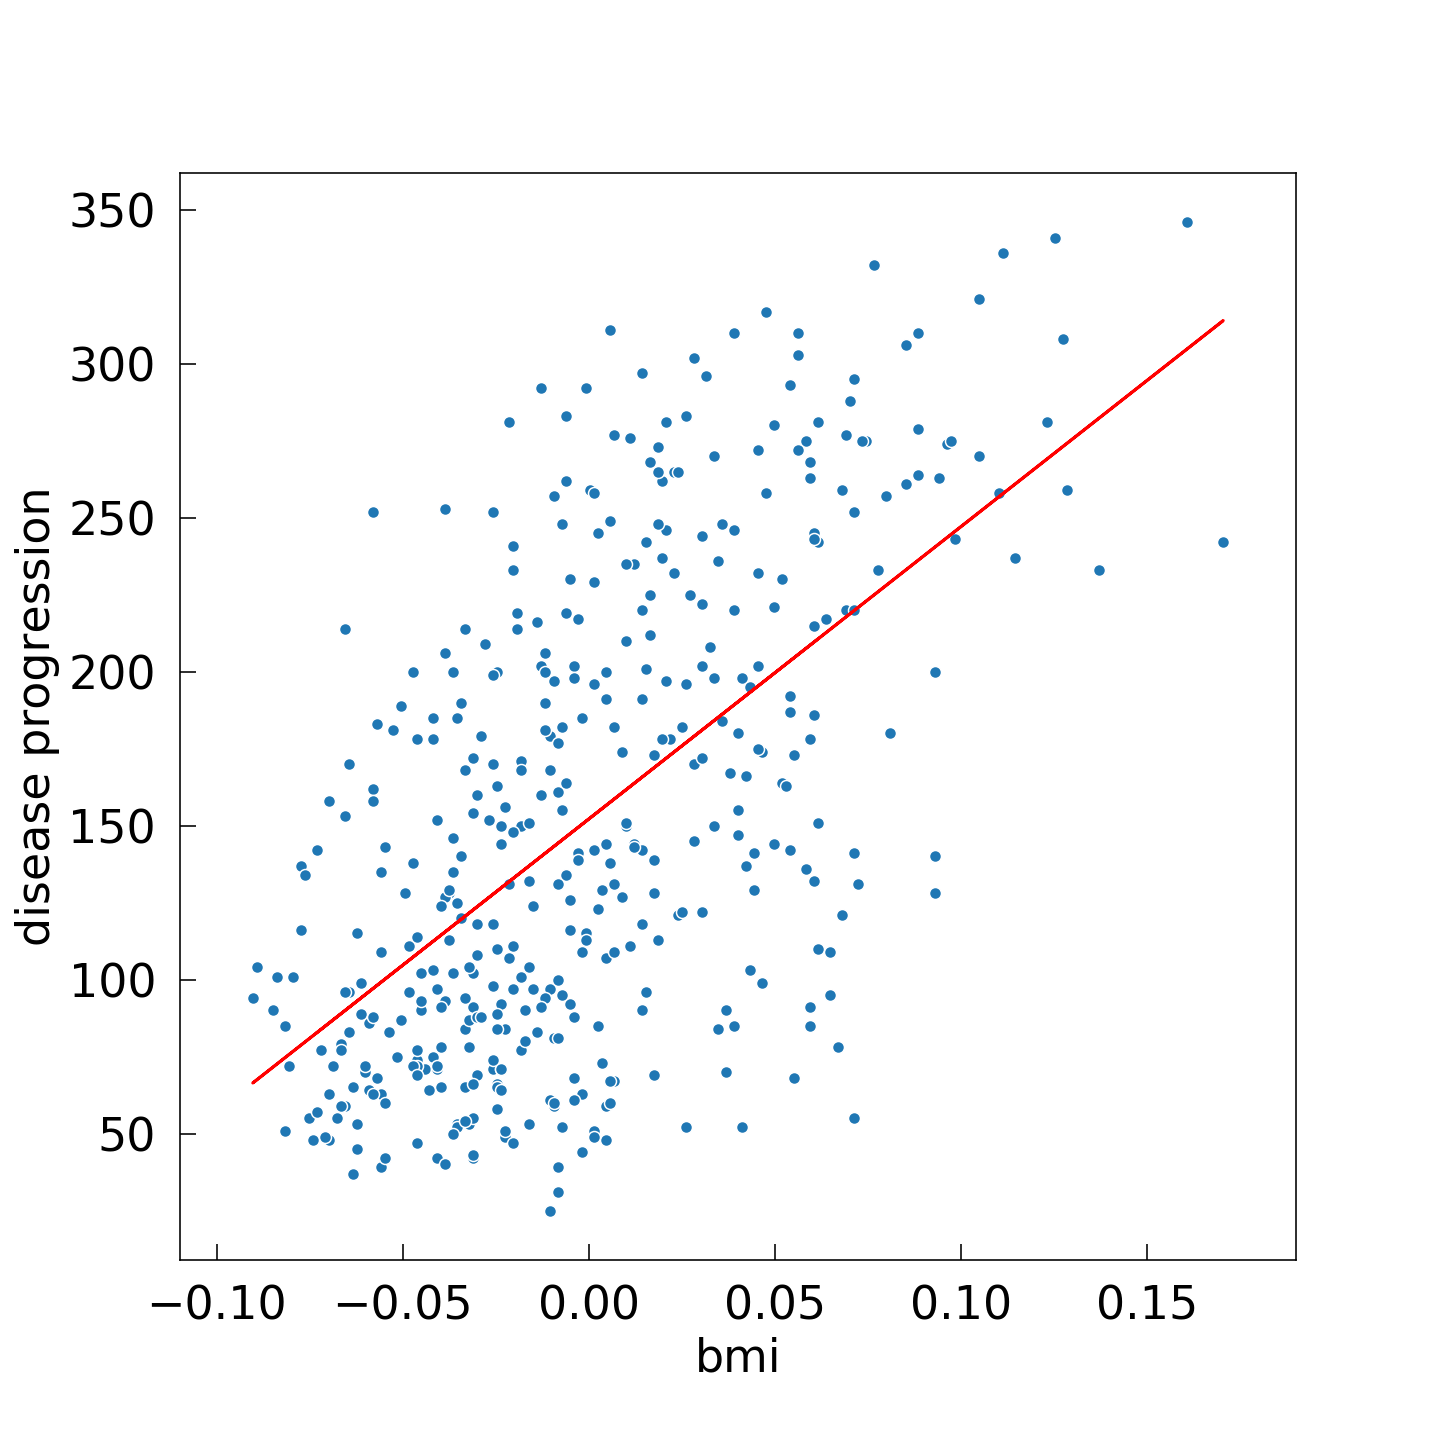

slope also called beta in our notation=  949.4352603839493
intercept also called c in our notation=  152.1334841628967


In [318]:
df_diabetes = pd.concat([pd.DataFrame(diabetes['data'],columns=diabetes['feature_names']),\
                       pd.DataFrame(diabetes['target'],columns=['disease progression'])],axis=1)

x = df_diabetes['bmi'] 
y = df_diabetes['disease progression']


fig, ax = plt.subplots( figsize = (10,10))
sns.scatterplot(x,y)
slope , intercept , r , pval , stderr = stats.linregress(x,y)#linear regression explaining disease progression thanks 
#to bmi
##don't mind how we did the regression for now, this is just for showcasing
print(r"slope also called beta in our notation= ",slope)
print("intercept also called c in our notation= ",intercept)


yPredict = x * slope + intercept #now that we have the outcome iof the regression which is in this case a slope and
#an intercept we can calulate what the model will predict as a diseas progression given a bmi

ax.plot( x , yPredict , color = 'red')#the outcome of the regression is this red line

So of course now the game become to best choose the vector of parameters $\pmb{\beta}$. For that there are two main methods (sorry Bayesian people...):
- Least Square fit
- Maximum Likelihood

We will need both and thus explore both.

Underlying those different methods, there are different models:

- Linear models
- Generalized linear models

The way we wrote the function linking $\pmb Y$ to $\pmb X$ above, have the noise term $\epsilon$ outside of the function. So one would say that this function only try to represent the mean of the response variable $\pmb Y$ along the curve. This is what we actually do in the framework of Linear models : we only aim to fit the mean response thanks to a linear relationship using the covariables.

If instead of fitting linearly the mean of the response variable, we would linearly fit a transfromed mean of the response variable, then we would be in the reign of Generalized Linear Model (at least almost: we are still missing the use of the maximum likelihood method) . 

GLM is a powerful framework that goes beyond (many of) the Linear Models limitations and we will introduce it later on this course.

# 1. Least Square Method

In the least square method we are interested in making the smallest overall square error between our model and the response variable. 
Typically we want to find the $\beta$ that minimizes:

$$S(\pmb\beta)=\sum_i (y_i-f(\pmb X_i,\pmb{\beta}))^2=\sum_i \epsilon_i^2$$

in mathematical terms you are looking for 

$$\hat{\pmb\beta}=\text{arg min}_{\pmb\beta}S(\pmb\beta)$$

Here the sum is over i, which counts the number of individuals.

> The hat $\hat{.}$, is a notation we use to denote our estimate of the true value of something. So in that sense $\hat{\pmb\beta}$ is the estimate of the "real" coefficient values, and $\hat{Y}$ is the estimation of $Y$ given by our model (also called the model predictions).



Let's see how that work on a toy example 

## 1.1 Simple representation of the problem and how it is solved

#### Toy example

Let's play with a toy example where we know the solution. We simulate a response variable that can be written $y=3x$, with x 1 covariable. We also add some gaussian noise on top of that. We are going to check if the OLS method can actully find this coefficient 3 back.

<IPython.core.display.Javascript object>


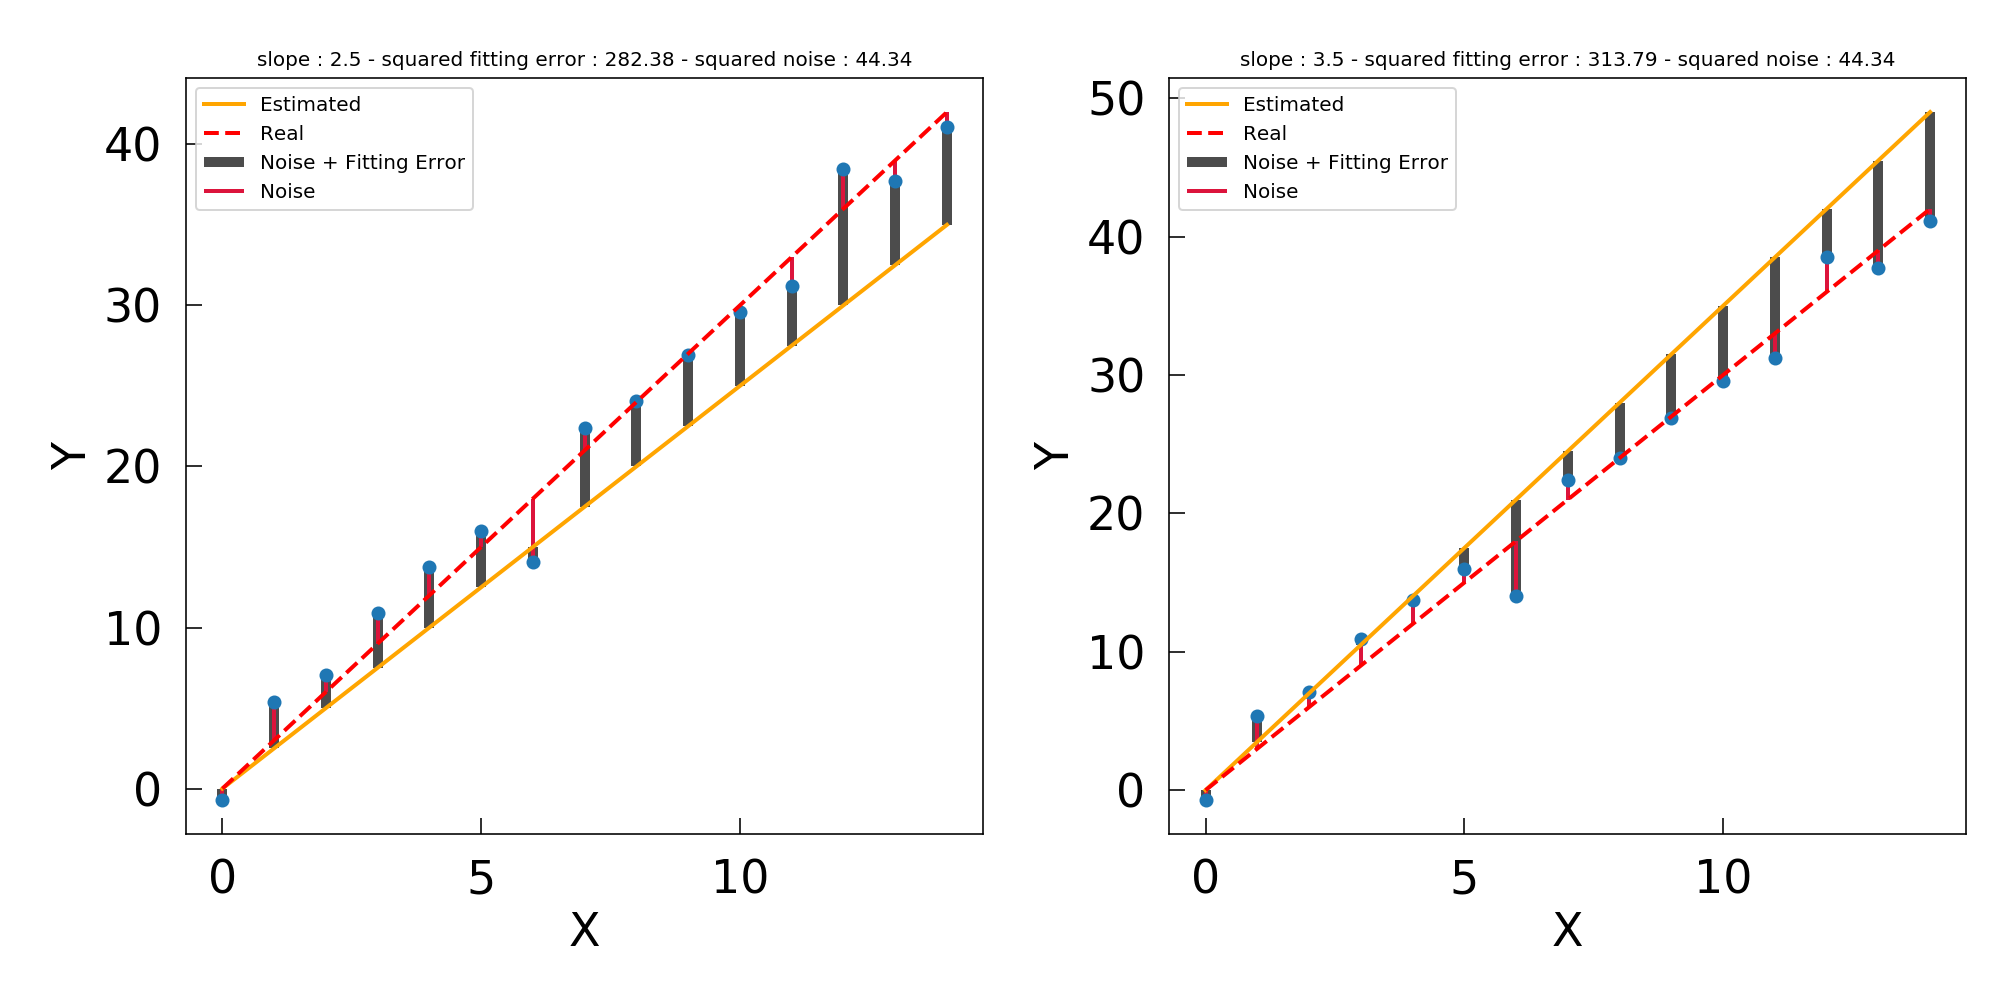

In [298]:
from matplotlib import collections  as mc

## let's create some data to plot
slopeReal = 3 # the real slope is 3
noise = 3
x = np.arange(15)
y = slopeReal * x + noise * np.random.randn(len(x)) # y = beta * x + some noise (no intercept here)

# The challenge of least square regression is to find the slope that minimizes the squared error
# let's try two possible values for the slope here conveniently around the true value of the slope
estimatedSlopes = [2.5,3.5]

fig, ax = plt.subplots(ncols=len(estimatedSlopes) , figsize = (14,7))

for i,slopeEstimate in enumerate(estimatedSlopes):
    yPredicted = slopeEstimate * x # prediction of y given the estimated slope and values of x
    
    y_true = slopeReal * x

    # error of the prediction
    predictionSquaredError = sum( ( yPredicted - y )**2 )
    TrueSquaredError = sum( ( y_true - y )**2 )

    ax[i].plot(x,y, 'o')
    ax[i].plot(x,yPredicted, color='orange' , linewidth=2,label='Estimated')
    ax[i].plot(x,y_true,'r--',linewidth=2,label='Real')
    ax[i].set_xlabel("X")
    ax[i].set_ylabel("Y")
    

    # now, let's represent the fitting error as segments between real and estimated values
    Real = [i for i in zip(x,y)]
    Predicted = [i for i in zip(x,yPredicted)]
    True_ = [i for i in zip(x,y_true)]
    lc = mc.LineCollection(zip(Real,Predicted) , colors='black',linewidths=5,alpha=0.7,label='Noise + Fitting Error')
    lc_True = mc.LineCollection(zip(Real,True_) , colors='crimson',linewidths=2,label='Noise')
    ax[i].add_collection(lc)
    ax[i].add_collection(lc_True)

    ax[i].set_title('slope : {} - squared fitting error : {:.2f} - squared noise : {:.2f}'.format(slopeEstimate,predictionSquaredError,TrueSquaredError) ,fontsize=10)
    ax[i].legend(fontsize=10)
plt.tight_layout()


<IPython.core.display.Javascript object>


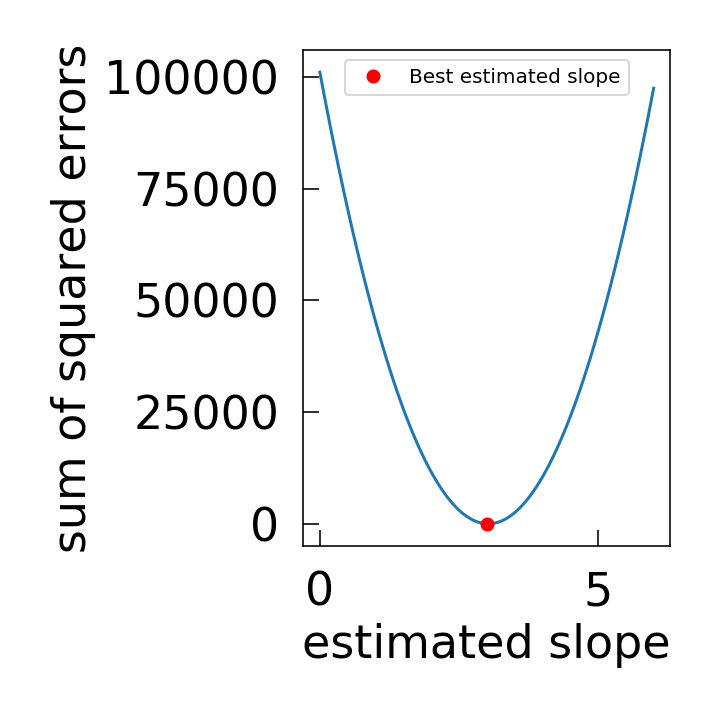

slope estimate with the smallest squared error (noise + fitting error) :  3.0


In [299]:
possibleSlopes = np.linspace(0,6,101)# hundread slopes to try : see above
errors = []
for sl in possibleSlopes: # we compute the sum of squared error for each slopes
    yPred = sl*x
    errors.append( sum( yPred - y )**2 )
fitted_slope=possibleSlopes[np.argmin(errors)]
min_err=min(errors)
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(possibleSlopes , errors )
ax.plot(fitted_slope , min_err,'ro' ,label='Best estimated slope')
ax.legend(loc='best',fontsize=10)


plt.xlabel('estimated slope')
plt.ylabel('sum of squared errors')
print( 'slope estimate with the smallest squared error (noise + fitting error) : ', fitted_slope )
plt.tight_layout()


While we could use various optimization algorithms to find the best value for $\beta$, 
when the system is overdetermined (*i.e.*, you have more points than coefficients $\beta_i$) an analytical solution exists. It is of the form:

$$\hat{\pmb\beta}=(\pmb X^T \pmb X)^{-1}\pmb X^T \pmb Y$$





## 1.2.Underlying hypothesis

There are a couple of important hypothesis behind this method:

- **Correct specification** : have a good incentive for the function you use
- **Strict exogeneity** : the errors are centered around the true value of y
- **No linear dependance** : you can not reconstruct one of your covariable by summing a subset of your covariables with some set of constant weights 
- **Spherical errors**: 
    - Homoscedasticity : the spread of the error is the same along the curve.
    - No autocorrelation : error are not correlated along the curve.
    
Normality is not strictly needed for Least Square fitting, neither for the variables nor for their errors. 
However you may need that hypothesis downstream in your analysis, for instance when using a test statistic.

If you errors are normally distributed, then Least Square fitting and Maximum Likelihood are equivalent, showing that your method for choosing $\pmb\beta$ is efficient and sound.

We will quickly present the Maximum Likelihood equivalent as it is both a very useful technic and helps broadening linear models to Generalized Linear Models.

Finally, within that set of constraints and even if the method is called Linear Models, it is possible to fit polynomials of a degree bigger than 1. To do so you just have to precompute the monomials and add them to your set of covariables.

For example :

$y=\beta x +c$ is a linear combination of x

$y=\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}$ is still a linear combination of features (covariables) x, $x^{2}$ and $x^{3}$, and **X** becomes {$x,x^2,x^3$\}

## 1.3. Goodness of fit

To have an idea of how good your fit is, you can either directly use the Mean Squared Error (MSE) or the adjusted coefficient of determination $\pmb R^2_a$.

The MSE is defined as follow:

<br>

$$MSE=\frac{\sum (y_i-\hat{y_i})^2}{n-2}$$ 
and accounts for what your model is missing. 
That could be the simple inherent variance induced by the noise term or the noise term and a missing term that your model doesn't take into account. By its nature, this metric makes it hard to compare between different hypothetical fitting models or different dataset.

A better normalized metric is the **adjusted coefficient of determination $\pmb R^2_a$**. 
The adjusted part is very necessary when we work in the context of multiple linear regression (more than one covariable). 

Let's start by defining the coefficient of determination $\pmb R^2$. 
This coefficient partitions the variance present in your data between what is taken into account by your model and what is not.

$$R^2=1-\frac{SSE}{SST}$$, where SSE is the sum of squared errors ($\sum_i (y_i-\hat{y_i})^2$) and SST in the sum of squares total ($\sum_i (y_i-\bar{y_i})^2$)

For the adjusted coefficient of determination you have to take into account that SSE and SST don't have the same degree of freedom and you should adjust for that.

$$R^2_a=1-\frac{n-1}{n-p}(1-R^2)$$, with $p$ the number of covariables and $n$ the number of individuals.

> Note : you can see that when there is only one covariable then $R^2_a = R^2$

## 1.4. Confidence interval and test statistics

After your fitting, you would probably like to know the confidence interval for each of your estimated $\beta$, as well as if they are truly necessary (significantly different from zero). 
For both **you can't truly do anything without making an hypothesis about the statistic of the noise** : here comes the part where assuming your noise to be normally distributed ($N(0,\sigma^2)$) becomes important, but potentially wrong too.

For the confidence interval, if you have an infinite amount of data you can show that the estimators are well described by a normal statistic (there is convergence in the distribution so that $(\hat{\pmb\beta}-\pmb\beta)\rightarrow N(0,\sigma^2 (\pmb X^T \pmb X)^{-1})$). 
So for big amount of points relative to the number of estimated parameters, you are not making a big mistake by writting:

$$\beta_j \in [\hat{\beta_j} \pm z_{1-\frac{\alpha}{2}}\sqrt{\hat{\sigma}^2 [(\pmb X^T \pmb X)^{-1}]_{j,j}}]$$ 

So in this formula, j is indexing one of the covariable, and the way you calculate the confidence interval is : first to inverse the $(\pmb X^T \pmb X)$ matrix and then take the diagonal term pp. The $z_{1-\frac{\alpha}{2}}$ would be 1.96 for 95% counfidence interval, as you usually do with a nornaml distribution

If you don't have a huge amount of data you need to show that you have an incentive about your noise statistic to use these kind of confidence intervals (some libraries that we are going to use can do that for you!).


For the significance of the coefficients, **if you know that your noise is normally distributed then you can use a t-test**.

**Let's proceed to an OLS fitting on a toy model produced thanks to the relation** $\pmb Y=-3*x+6X^3+1$

In [300]:
## Statsmodel scale your variable to unit lenght automatically so no need for scaling here.

import statsmodels
import statsmodels.api as sm

###making toy data
nsample = 200
x = np.linspace(0, 10, nsample)#this is our covariable
X = np.column_stack((x, x**3))#here with have only one real covariable, 
#but we will increase that number by also considering it's cube in our model
beta = np.array([1, -3, 6])#the true value of our paramters associated to our covariables
e = 100*np.random.normal(size=nsample)#for now noise is 0, but play with it

X = sm.add_constant(X)##adding the intercept
y = np.dot(X, beta) + e## making y=1-3x+6x^3 +noise
y_true=np.dot(X, beta)

model = sm.OLS(y, X)##defining an Ordinary Least Square variable
results = model.fit()##fitting it

res=results.summary()

print(res)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.954e+04
Date:                Tue, 20 Oct 2020   Prob (F-statistic):          7.41e-245
Time:                        17:27:44   Log-Likelihood:                -1201.1
No. Observations:                 200   AIC:                             2408.
Df Residuals:                     197   BIC:                             2418.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0886     18.505     -0.545      0.5

The first panel gives you an overview of the fit quality:
* You recognize the good old $R^2$ and $R_a^2$
* The F-statistic and its associated P-value test the hypothesis that all the coefficients are 0 (normality assumption)
* Log-likelihood (normality assumption + this is the next big part so keep it on a corner of your mind)
* AIC and BIC respectively Aikike Information Criterion and Bayesian Information Criterion are used (like log likelihood) for model goodness of fit comparison that you can use to compare non nested models. Yet they are, from my point of view less interpretable in the sense of what a threshold that you will put on those criterion means.

The second panel is quite self explanatory, just be careful with this t-test which again makes the assumption that errors are normally distributed, same for the standard error and the 95% confidence interval.

The third panel is a summary of a few statistical tests that will give you a sense of how all of the hypothesis needed for OLS are plausible:
* Omnibus and Prob(omnibus): this is a test for normality of residuals. Low P-values means that your linear model is not adapted
* Durbin-Watson : tests autocorrelation in the error terms (2 is no autocorrelation, less than 1 is bad)
* Jarque-Bera: tests if the skewness and kurtosis of your errors are looking like a normal distribution. If the Pvalue is high then they look normal.
* Condition Number : sensibility to noise of the fit.Skewness and kurtosis of your noise (both 0 for normally distributed noise).

In [302]:
#### a little bit of gymnastic to get this summary saved and usable.

results_as_html = res.tables[0].as_html()

result_general_df2=pd.read_html(results_as_html, header=0, index_col=0)[0]
list1=["Dep. Variable:"]+list(result_general_df2.index)+[result_general_df2.columns[1]]+list(result_general_df2[result_general_df2.columns[1]])
list2=[result_general_df2.columns[0]]+list(result_general_df2[result_general_df2.columns[0]])+[result_general_df2.columns[2]]+list(result_general_df2[result_general_df2.columns[2]])

dico_i={s:v for s,v in zip(list1,list2)}

result_general_df=pd.DataFrame([[dico_i[v]] for v in list1],index=list1,columns=['Value'])


results_as_html = res.tables[1].as_html()
result_fit_df=pd.read_html(results_as_html, header=0, index_col=0)[0]

In [303]:
# I have put the overall recap of the fit in a dataframe format so you can use it later
result_general_df

,Value
Dep. Variable:,y
Model:,OLS
Method:,Least Squares
Date:,"Tue, 20 Oct 2020"
Time:,17:27:44
No. Observations:,200
Df Residuals:,197
Df Model:,2
Covariance Type:,nonrobust
R-squared:,0.997


In [304]:
# I have put the outcome of the fit in a dataframe format so you canuse it later
result_fit_df

,coef,std err,t,P>|t|,[0.025,0.975]
const,-10.0886,18.505,-0.545,0.586,-46.582,26.405
x1,2.6377,6.008,0.439,0.661,-9.211,14.486
x2,5.9283,0.061,97.110,0.000,5.808,6.049


<IPython.core.display.Javascript object>


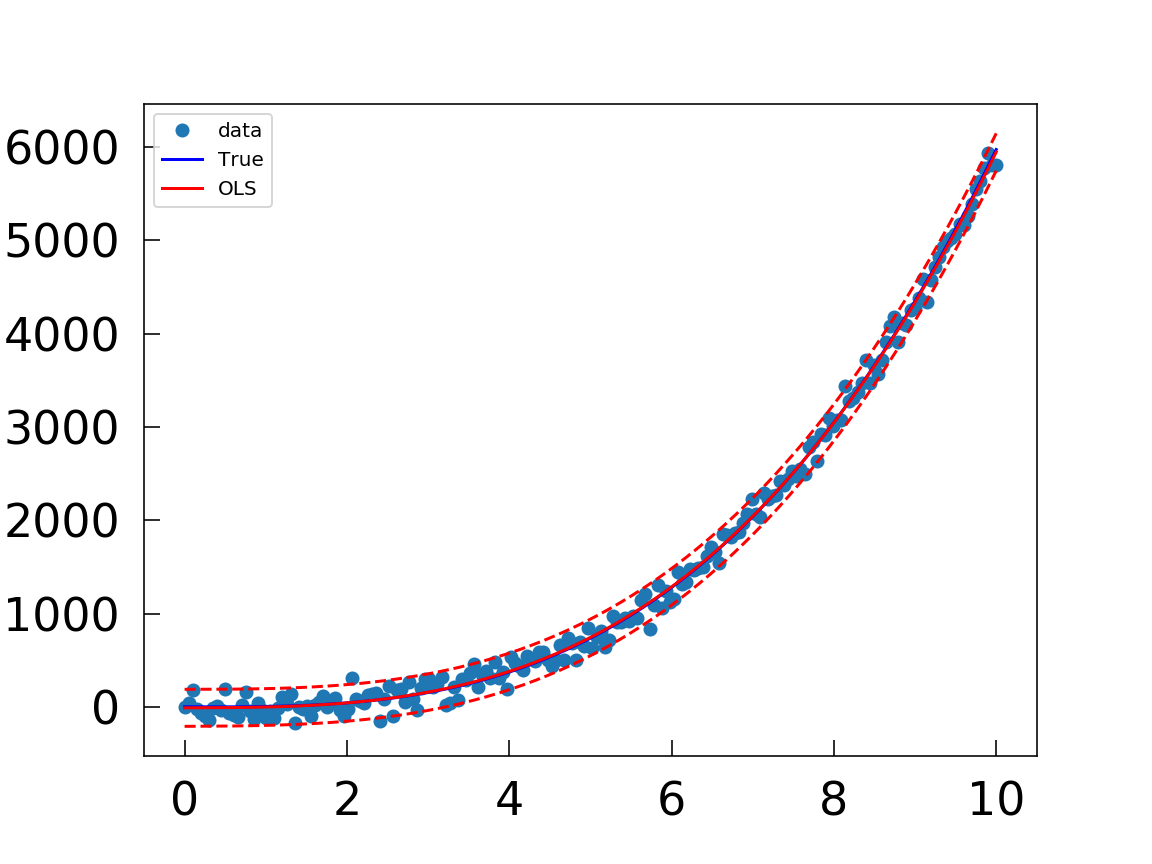

In [301]:
###Plotting the fit

#for some noise: scale=1000

from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, results.fittedvalues, 'r', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best',fontsize=10)
#plt.yscale('log')

**real dataset example : modelize the effect of park frequentation on sparrow nest number**


TESTING THE RISK-DISTURBANCE HYPOTHESIS IN A FRAGMENTED LANDSCAPE: NONLINEAR RESPONSES OF HOUSE SPARROWS TO HUMANS
Fernández-Juricic(2003),BioOne

In [394]:
#df=pd.DataFrame([[y[i],X[i]]for i in range(len(X))],
                #columns=["Breeding density(individuals per ha)","Number of pedestrians per ha per min"],
               #index=np.arange(len(X)))

In [395]:
#df.head()

,Breeding density(individuals per ha),Number of pedestrians per ha per min
0,7.974940,0.851146
1,33.316187,3.973849
2,60.407007,5.955376
3,89.562266,5.959888
4,74.250691,6.039171


In [396]:
#df.to_csv("Human_nuisance_csv")

In [402]:
df=pd.read_csv("Human_nuisance_csv")
y=list(df["Breeding density(individuals per ha)"])
X=list(df["Number of pedestrians per ha per min"])

<IPython.core.display.Javascript object>


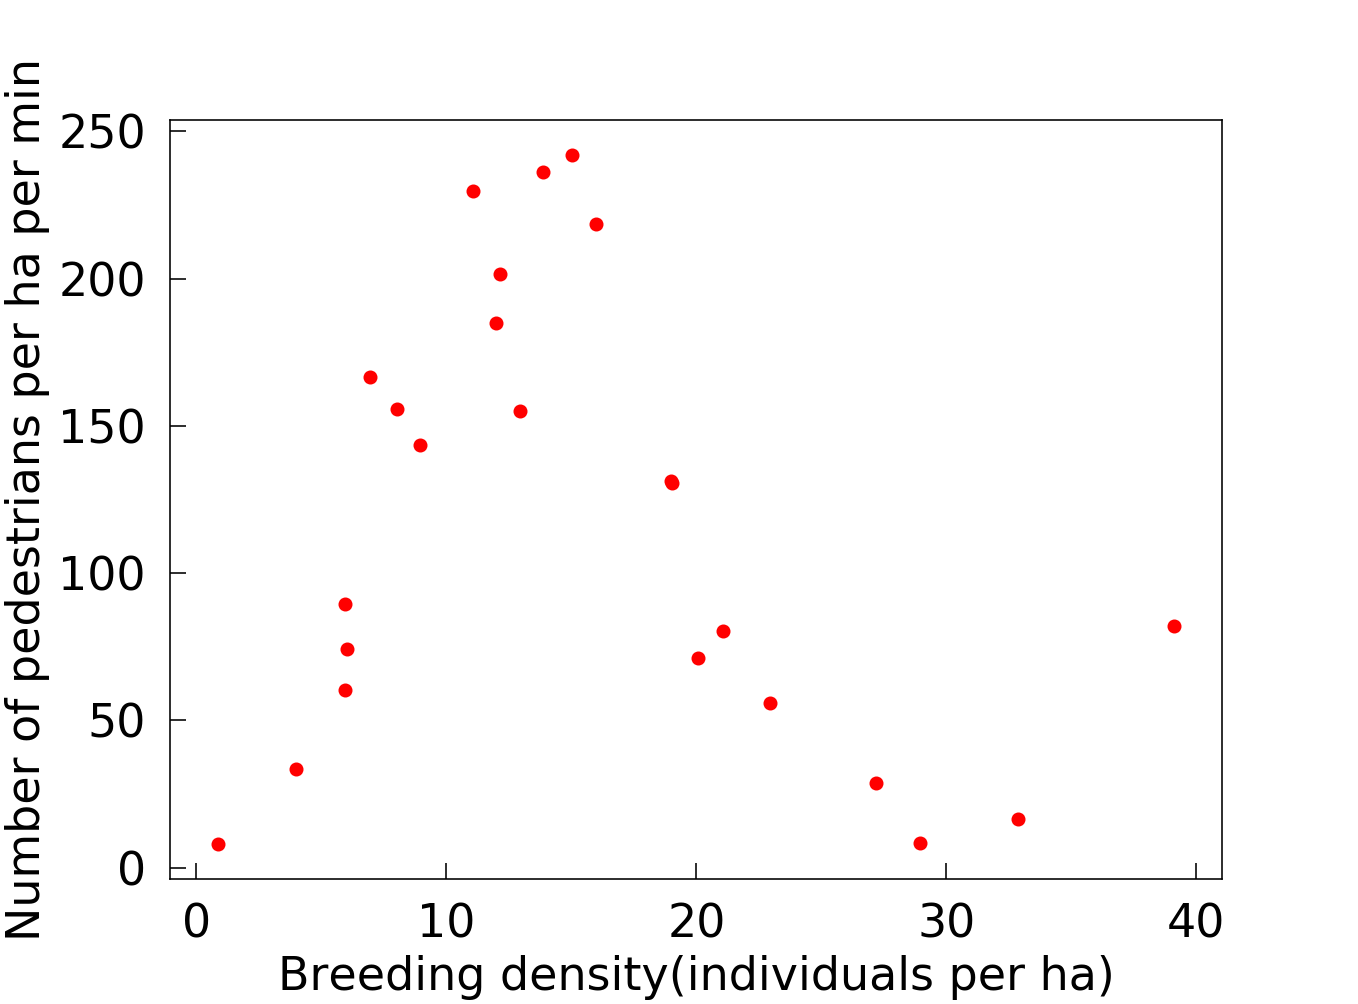

Text(0, 0.5, 'Number of pedestrians per ha per min')

In [403]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X,y,'ro')
ax.set_xlabel("Breeding density(individuals per ha)")
ax.set_ylabel("Number of pedestrians per ha per min")

## 1.5 What to do when some hypothesis about OLS are not true

When the homoscedasticity of your data is not true you have a few possibilities:
- you can transform your data so your data become homoscedastic (for example you could use variance stabilizing transformation, or a simple log transform or other...)
- you can change your loss function that we previously called $S(\beta)$ to reweight the different members of that equation by taking into account the discrepancy in terms of variance. That only works if there is no correlation between the error terms. In that case the method is called Weighted Least Square and it simply transformed to $S(\pmb\beta)=\sum_i \frac{1}{\sigma_i^2} (y_i-f(\pmb X_i,\pmb{\beta}))^2$.
- if there is a correlation between the different error terms then it becomes more complicated, but technics exist such as Generalized Least Square model

Finally if you know  what statistics your measurement follow, you can bypass all of those problems (and encounter others :-)) by using a maximum likelihood estimation rather than an LS method. By doing so you will have to put yourself in the framework of Generalized Linear Models.

So I guess it is time to introduce Maximum Likelihood and later on Generalized Linear Models.

# 2 Maximum Likelihood

Maximum Likelihood is a method that is used to estimate parameters of a probablililty distribution. It is done by maximizing the likelihood function. In the case that we are interested in (i.e. independant identically distributed) this likelihood function is simply the product of  a density function values over the entire sample. It is a parametric method since it needs to have an a priory about the density function for it to work. Since it is a product, most of the time we would rather work with the log likelihood function which transforms this product into a sum.

So we would like to maximize $l$, the loglikelihood function, by choosing a set of parameters $\pmb\Theta$.
Where $l$ is of the form:

$$l(\pmb\Theta;X)=\sum_i ln(p(x_i|\pmb\Theta))$$

Where $X$ is a random variable and $p()$ is the density function associated to $X$. So you want to find the following estimation for $\pmb\Theta$

$$\hat{\pmb\Theta}=\text{arg max}_{\pmb\Theta}l(\pmb\Theta;X)$$

Let's take the example of a gaussian where you would like to estimate the $\sigma$ and the $\mu$, given your data. As they are simulated data we know that $\mu=2$ and $\sigma=0.5$

In [108]:
def gaussian_dist(x,mu,sigma):
    return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-1./(2*sigma**2)*(x-mu)**2)



<IPython.core.display.Javascript object>


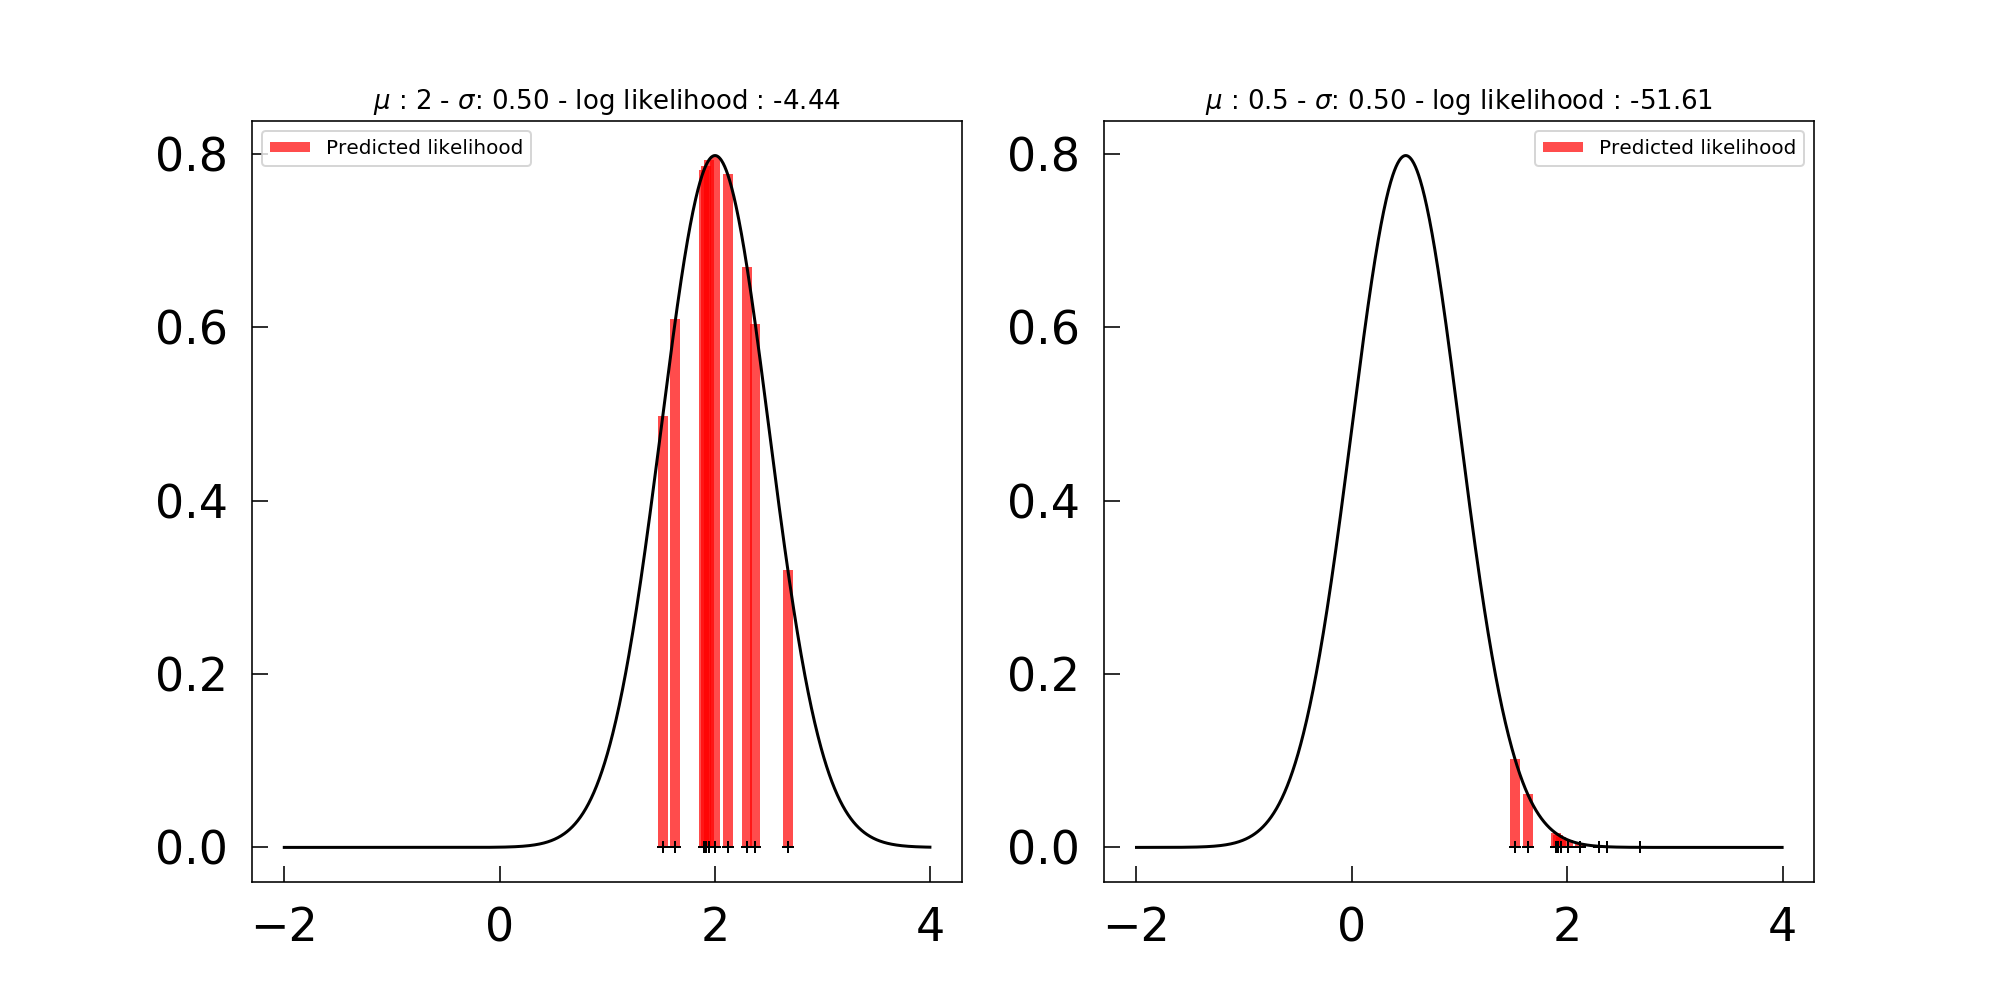

In [122]:
m=[2,0.5]
s=[0.5,0.5]
fig, ax = plt.subplots(ncols=len(m) , figsize = (14,7))
X_small=np.random.randn(10)*0.5+2
X_small_=[[v,0] for v in X_small]
x=np.arange(-2,4,0.005)

for q in range(len(m)):
    ax[q].plot(X_small,[0 for i in range(len(X_small))],'k+')

    ax[q].plot(x,[gaussian_dist(v,m[q],s[q]) for v in x],'k')
    Predicted=[gaussian_dist(v,m[q],s[q]) for v in X_small]
    Predicted_=[i for i in zip(X_small,Predicted)]
    lc = mc.LineCollection(zip(X_small_,Predicted_) , colors='red',linewidths=5,alpha=0.7,label='Predicted likelihood')
    ax[q].add_collection(lc)
    ax[q].legend(loc='best',fontsize=10)
    sum_like=sum([np.log(f) for f in Predicted])
    ax[q].set_xlabel('X')
    ax[q].set_ylabel('Likelihood')
    
    ax[q].set_title('$\mu$ : {} - $\sigma$: {:.2f} - log likelihood : {:.2f}'.format(m[q],s[q],sum_like) ,fontsize=13)

plt.tight_layout()    

Multiplying those red bars is exactly what the maximum likelihood does. Basically you shit your theoritical distribution to the right or the left (trying different means), and you narrow it or widen it (trying different variances). For each of those try you multiply those red bars together, and the highest result is the one maximizing the likelihood of your data being produce by that distribution with those parameters, as those red bars by definition represent the likelihood 

<IPython.core.display.Javascript object>


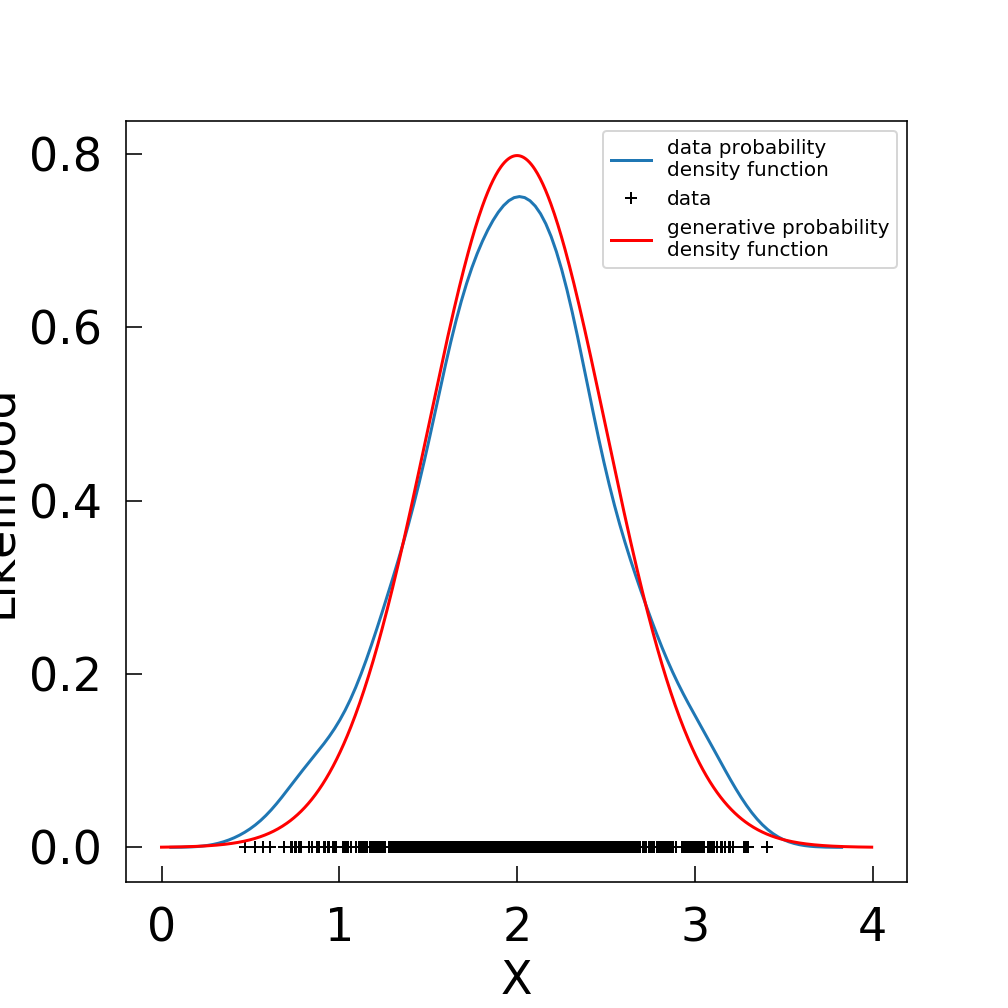

In [142]:
X=np.random.randn(800)*0.5+2
fig = plt.figure(figsize = (7,7)) 
sns.kdeplot(X,label='data probability\ndensity function')
x=np.arange(0,4,0.005)
plt.plot(X,[0 for i in range(len(X))],'k+',label='data')
plt.plot(x,[gaussian_dist(v,2,0.5) for v in x],'r',label='generative probability\ndensity function')
plt.ylabel('Likelihood')
plt.xlabel('X')
plt.legend(loc='best',fontsize=10)

I just want to point out here that even when our data are actually coming from a certain distribution, there will always be difference between the theoritical distribution and the recovered one, as to have perfect match you will need infinite number of data point.

Highest likelihood is for \mu and \sigma : 2.0 0.5


<IPython.core.display.Javascript object>


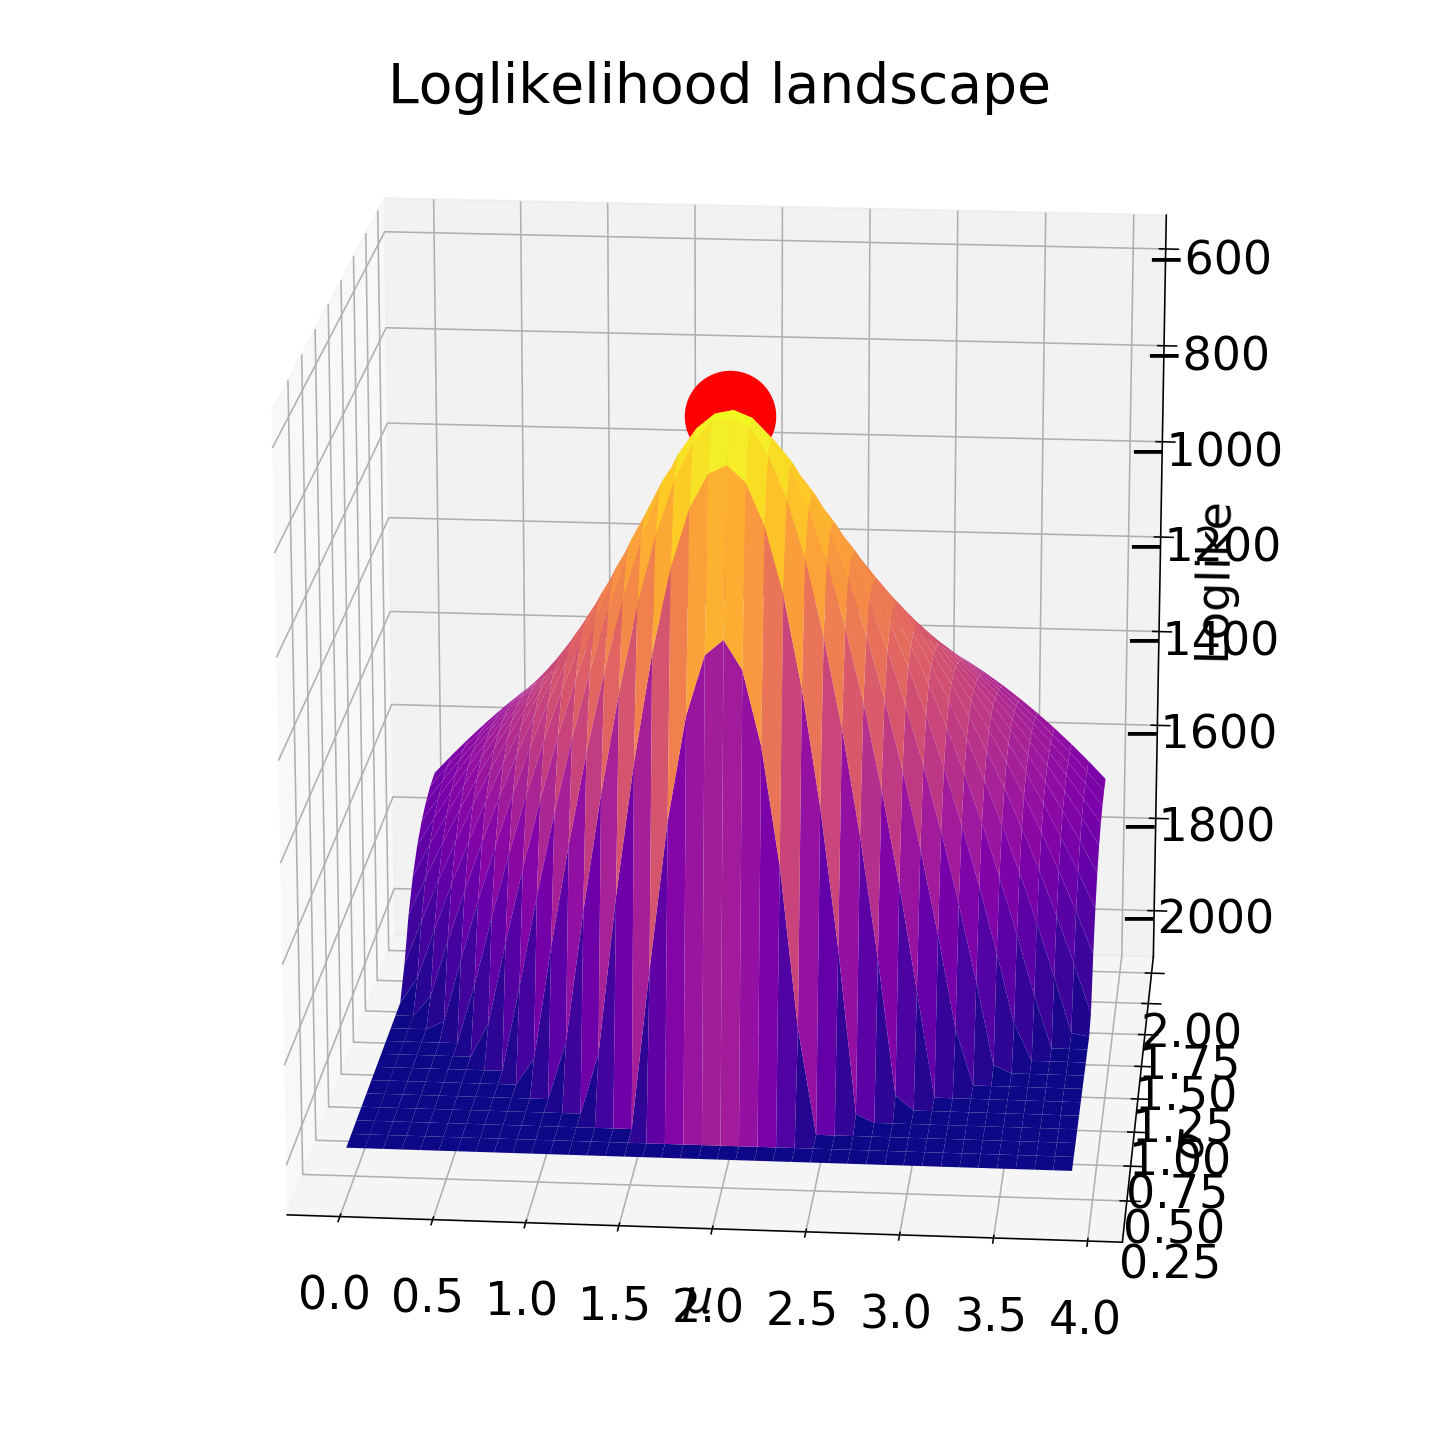

In [143]:
import math

mu=np.arange(0,4,0.1)
sigma=np.arange(0.1,2.1,0.1)

mu,sigma=np.meshgrid(mu,sigma)
def loglike_func(X,mu,sigma):
    ll=sum([np.log(gaussian_dist(u,mu,sigma)) for u in X])
    for i in range(len(ll)):
        if math.isnan(ll[i])==True or ll[i]<-2000:
            ll[i]=-2000
    return ll

zs=np.array(loglike_func(X,np.ravel(mu),np.ravel(sigma)))
loglike=zs.reshape(mu.shape)

from mpl_toolkits.mplot3d import Axes3D 
print(r'Highest likelihood is for \mu and \sigma :',np.ravel(mu)[np.argmax(zs)],np.ravel(sigma)[np.argmax(zs)])

fig = plt.figure() 
ax = Axes3D(fig)
ax.plot_surface(mu,sigma,loglike,cmap='plasma') 
ax.scatter(np.ravel(mu)[np.argmax(zs)],np.ravel(sigma)[np.argmax(zs)],max(zs),s=2000,c='r')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('Loglike')
plt.title("Loglikelihood landscape")

plt.show()

Nicely enought this maximum likelihood method allows us to recover the true parameters of the distribution.


Let us look at the curvature of the loglikelihood space as it is bearing useful information. For that we are going to look at how the log likelihood function behave in function of $\mu$ when $\sigma=0.5$. Same for the behaviour of the likelihood function according to $\sigma$ when $\mu=2$

In [155]:
def loglike_func_sigma(X,sigma,mu=2):
    ll=sum([np.log(gaussian_dist(u,mu,sigma)) for u in X])
    
    if math.isnan(ll)==True or ll<-10000:
        ll=-10000
    return ll
def loglike_func_mu(X,mu,sigma=0.5):
    ll=sum([np.log(gaussian_dist(u,mu,sigma)) for u in X])
    
    if math.isnan(ll)==True or ll<-10000:
            ll=-10000
    return ll

<IPython.core.display.Javascript object>


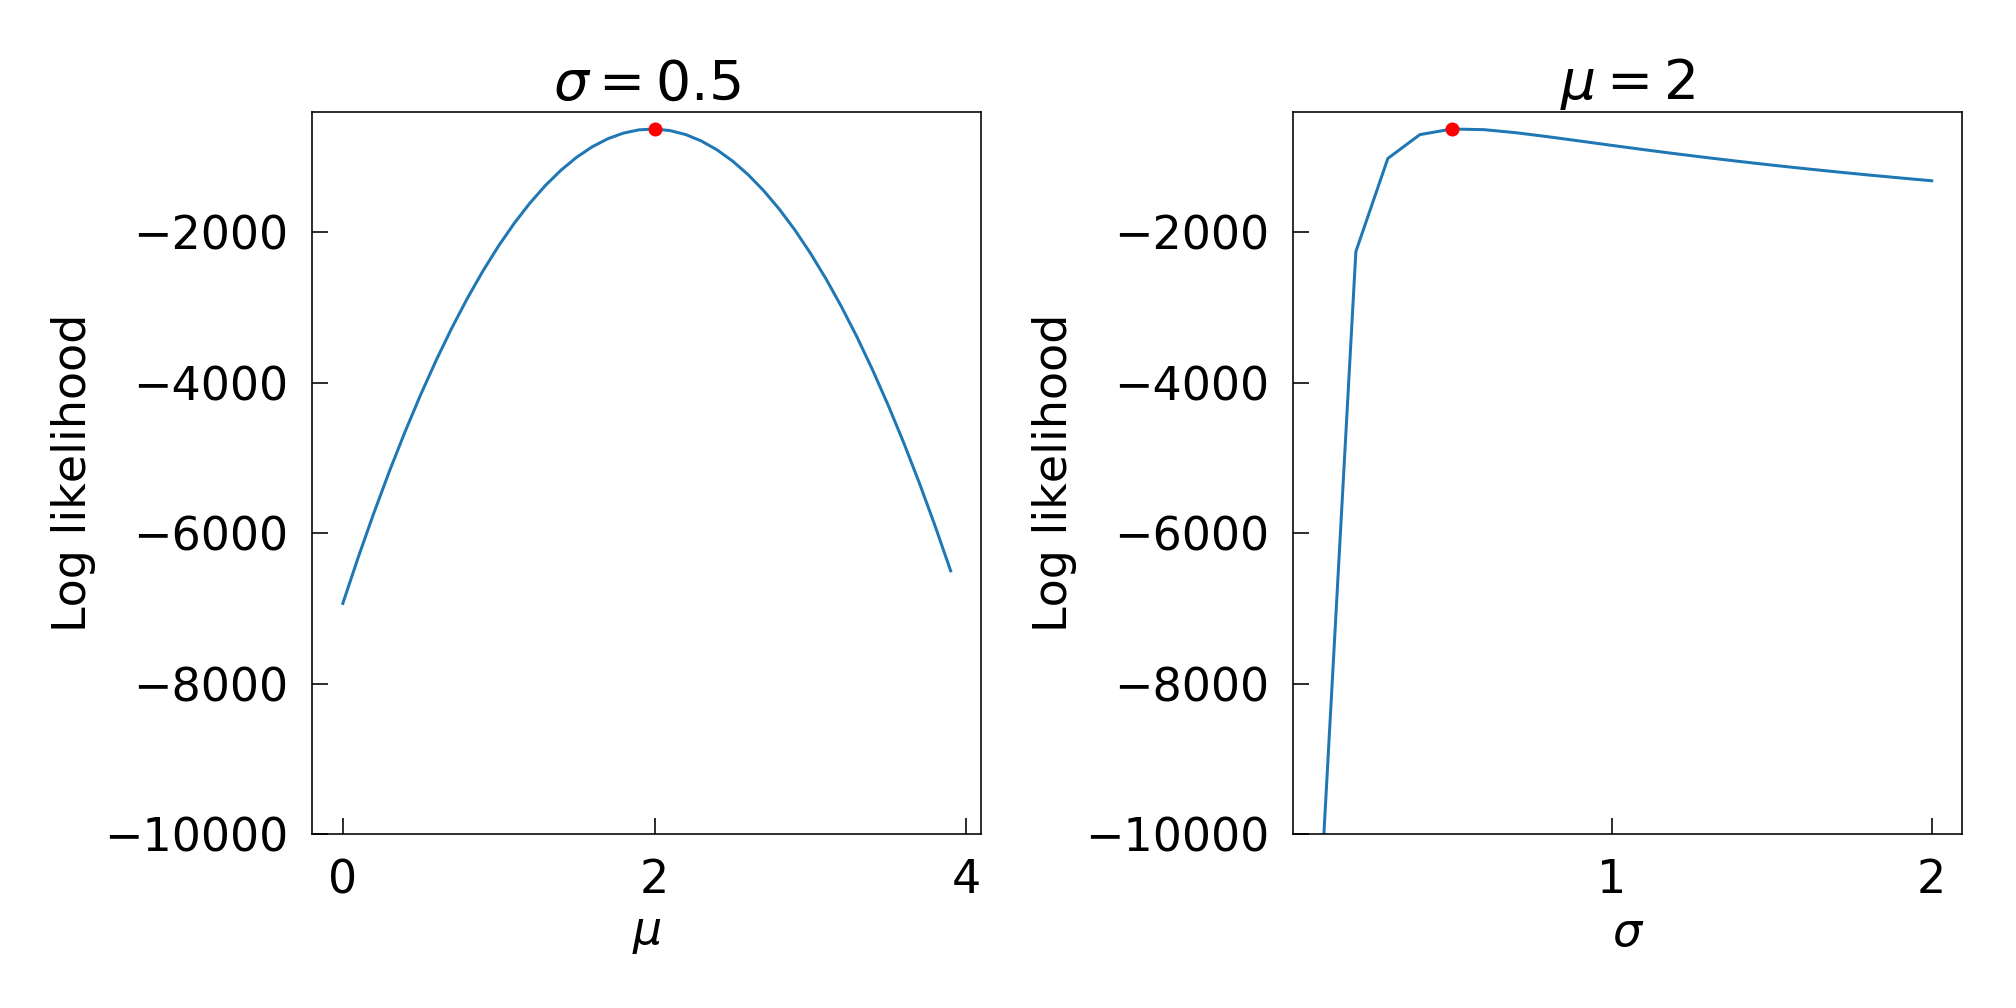

In [158]:
fig, ax = plt.subplots(ncols=len(m) , figsize = (14,7))
mu=np.arange(0,4,0.1)
sigma=np.arange(0.1,2.1,0.1)

for q in range(2):
    if q==0:
        ax[q].plot(mu,[loglike_func_mu(X,v,sigma=0.5) for v in mu])
        ax[q].plot([2],[loglike_func_mu(X,2,sigma=0.5)],'ro')
        ax[q].set_xlabel('$\mu$')
        ax[q].set_ylabel('Log likelihood')
        ax[q].set_title('$\sigma=0.5$')
    if q==1:
        ax[q].plot(sigma,[loglike_func_sigma(X,v,mu=2) for v in sigma])
        ax[q].plot([0.5],[loglike_func_sigma(X,0.5,mu=2)],'ro')
        ax[q].set_xlabel('$\sigma$')
        ax[q].set_ylabel('Log likelihood')
        ax[q].set_title('$\mu=2$')
    ax[q].set_ylim([-10000,-400])
plt.tight_layout()

I would to draw a little bit of attention on the curvature of the loglikelihood function here. You can see here that the way the loglikelihood drop around the red dot for $\mu$ and $\sigma$ is quite different. For $\mu$ the steepness of the slopes around the maximum are important an well defined, whereas for $\sigma$ it is way more flatter. This as a direct consequence on how narrow your confidence interval are going to be. You can see that as the log likelihood function is flatter, there is a wider range of $\sigma$ that have a loglikelihood equivalent to the maximum.

I was talking of steepness of "steepness of the slopes" before. In mathematical term this corresponds to the second derivativeof the loglikelihood function. The bigger this second derivative is the steeper are the slopes. You can put all those second derivatives in a matrix called the hessian matrix. In our case : 
$$
\begin{bmatrix}
    \frac{\partial^2l}{\partial\mu^2} & \frac{\partial^2l}{\partial\mu\partial\sigma} \\
    \frac{\partial^2l}{\partial\sigma\partial\mu} & \frac{\partial^2l}{\partial\sigma^2}
  \end{bmatrix}
$$

You can have a geometrical intepretation of the confidence interavl by seeing that it is related to the inverse of this second derivative or the inverse of that hessian matrix. This inverse is called radisu of curvature, and the bigger the second derivative is going to be, the smaller that radius of curvature is going to be 

#### What is the link between OLS method and Maximum likelihood?

Let's now imagine that we try to fit the average of a Y, $\hat{Y}$, along the curve $\hat{Y}=\beta X+c$ for which the noise around those averages is gaussian. Since we didn't put the noise in this equality, thus it really represents a fit of the average of Y with some guassian noise around that average. The equation representing the fitting of Y would be $Y=\beta X+c+\epsilon$. 

We could thus consider that we can switch to the following problem of distribution fitting, defined by the density function:

$$p(y_i|\bar{y_i},\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}*\exp(-\frac{1}{2}\frac{(y_i-\bar{y_i})^2}{\sigma^2})$$

Note that the parameters you want to estimate are $\bar{y_i}$ and $\sigma$.

By definition of the  likelihood function over $n$ individuals in a sample is:

$$\Pi_i \frac{1}{\sqrt{2\pi\sigma^2}}*\exp(-\frac{1}{2}\frac{(y_i-\bar{y_i})^2}{\sigma^2})$$

which transformed into the loglikelihood function:

$$l(\bar{y_i},\sigma;Y) = \sum_i -\frac{1}{2}\frac{(y_i-\bar{y_i})^2}{\sigma^2} + constant$$

Now let's rewrite $\bar{y_i}=\beta x_i+c=f(x_i,\beta)$. So now the game is to find $\beta$ and $c$.

You see now that maximizing $\sum_i -(y_i-f(x_i,\beta))^2$ over $\beta$ is the same than minimizing $\sum_i (y_i-f(x_i,\beta))^2$ over $\beta$(which is what we wrote for Ordinary Least Square)


#### Bringing back together everything we have seen before

As a side note for now, but important for the rest:

$$\hat{\pmb\beta}=(\pmb X^T \pmb X)^{-1}\pmb X^T \pmb Y$$

is the solution from both the maximum likelihood in the case of normally distributed noise, and the least square fit.

As a quick proof, and also to get a feeling of how all of this is working we can take the simple case of $\bar{y_i}=\beta x_i=f(x_i,\beta)$.

In that case the loglikelihood look like 

$$l=\sum_i -\frac{1}{2}\frac{(y_i-\beta x_i)^2}{\sigma^2} + constant $$

$$\frac{\partial l}{\partial \beta}\propto\sum_i -2x_iy_i + 2\beta x_i^2$$

You want $\frac{\partial l}{\partial \beta}(\hat{\beta})=0$ as you are maximizing the likelihood so you end up with:

$$\hat{\beta} \sum_i x_i^2=\sum_i x_iy_i$$

Which in multivariate actually corresponds to $(\pmb X^T \pmb X)\hat{\pmb\beta}=\pmb X^T \pmb Y$

The term $(\pmb X^T \pmb X)$ plays a special role, here and in the confidence interval seen before $\beta_j \in [\hat{\beta_j} \pm z_{1-\frac{\alpha}{2}}\sqrt{\hat{\sigma}^2 [(\pmb X^T \pmb X)^{-1}]_{j,j}}]$: 

$(\pmb X^T \pmb X)$ is generally related to the covariance of $\pmb X$. But in that specific case (normality), it is also a matrix representing the curvature of the log likelihood function at $\hat{\pmb \beta}$. You calculate the curvature of a function by calculating the matrix of second derivative called hessian. In our case you just differentiate one more time what we found before :

$$\frac{\partial^2 l}{\partial \beta^2}\propto\sum x_i^2$$

Calculating a confidence interval in the general case (in the case of the GLM that we will see later for example), involves inverting the curvature of the loglikelihood function at the estimated $\hat{\pmb \beta}$ and put in a normal confidence interval as seen before. In statistic this curvature matrix (also called hessian in mathematic) is related to the Fisher Information that we will use later.

## 1.6. Model choosing

Most of the time you are not sure of the model you want to fit. You might have a broad idea of the different forms of the function but you don't really know for example what would be the best degree for your poynomial or if all the covariables are actually necessary. Of course you could say "I am keeping the model that fit the best in term of $R^2$". But the question really is : is that bunch of extra parameters that are complexifying my model worth the increase in $R^2$?

We touched that question in 1.4 by asking about the significance of parameters values. Again if you are confident on the noise distribution you are dealing with (let's say it is normally distributed), and you have a function in mind but you don't know if you should include 1,2 or $p$ covariables then the problem is easy: you can use a log-likelihood ratio test.


### Likelihood ratio test (LRT)


To perform a likelihood ratio test you just have to calculate the difference between the maximised log-likelihood of the two models you are comparing. You can estimate the significance of that difference either by using a test statistic (approximate method) or by simulation.

LRT are to be used in the case of nested function comparison. Nested functions are functions that have the same form but differ from the number of parameters used : for example comparing $y=\beta_1 x_1 +c$ and $y=\beta_1 x_1 +\beta_2 x_2 +c$. In this course this will always be the case (but just remember that outside of this course you might want to do other comparison, so be carefull).

Quickly :

You want to compare model $M_0$ and $M_1$, respectively having $\{\beta_{1,0}\}$ and $\{\beta_{1,2},\beta_{2,2}\}$ as parameters. You want to see if adding this extra parameter $\beta_{2,2}$ is worth it.

The LRT statistics is :

$$2*(l(X;\hat{\beta}_{1,2},\hat{\beta}_{2,2})-l(X;\hat{\beta}_{1,0}))$$

Where the hat represents the maximum likelihood estimates. The LRT statistic asymptoptically, for your sample size going to infinity, follows a **chi-square distribution with a number of degree of freedom equal to the difference between the number of degrees of freedom in your models**. You have thus access to a P-value which will help you to decide if complexifying your model is worth it. Typically this LRT statistic could be view as a distance in term of goodness of fit. If this distance is big compared to what a typical goodness of fit for the model with the fewer parameters gives you then it is interesting to keep the complexified model. If this LRT statistic is big then the Pvalue will be low (in the sense that this is not usually a distance that you could only explain by the capacity of your few parameter model to fit your data).

Note how in the LRT statistic I have put the complex model first then the simple model.


To calulate this P-value you can use $1-scipy.stats.chi2.cdf(LRT,df_{M_1}-df_{M_0})$, where $df$ is the number of degree of freedom of the models.

Just to clarify again : you want to go for the model with the least paramter and for which adding more parameter doesn't siginicantly increase the goodness of fit.

#### Example model choosing : on diabetes

# Exo model choosing OLS + loglikelihood : on the sparrow nuisance

# Generalized linear model

So, previously we saw that under some hypothesis we could use the Oridnary Least Square method to fit a curve. We also saw that if we knew that the errors were normally distributed then this OLS method was equivalent to using another method called Maximum Likelihood. We also mentioned that if the OLS hypothesis were not verified, then we could use what is called a Generalized Linear Model. As you will see this GLM also rely on the Maximum Likelihood method.

First, let's se a typical cases where our OLS is not going to work, and where I am pretty sure you will have some ideas.

#### Practical case 1 : exponential growth of Corona virus infection

In [173]:
df_corona_exp=pd.read_csv('exponential_covid.csv')
df_corona_exp["Days"]=df_corona_exp.index
df_corona_exp.drop("Time",1,inplace=True)
df_corona_exp.head()

,Infections,Days
0,1,0
1,1,1
2,2,2
3,2,3
4,5,4


<IPython.core.display.Javascript object>


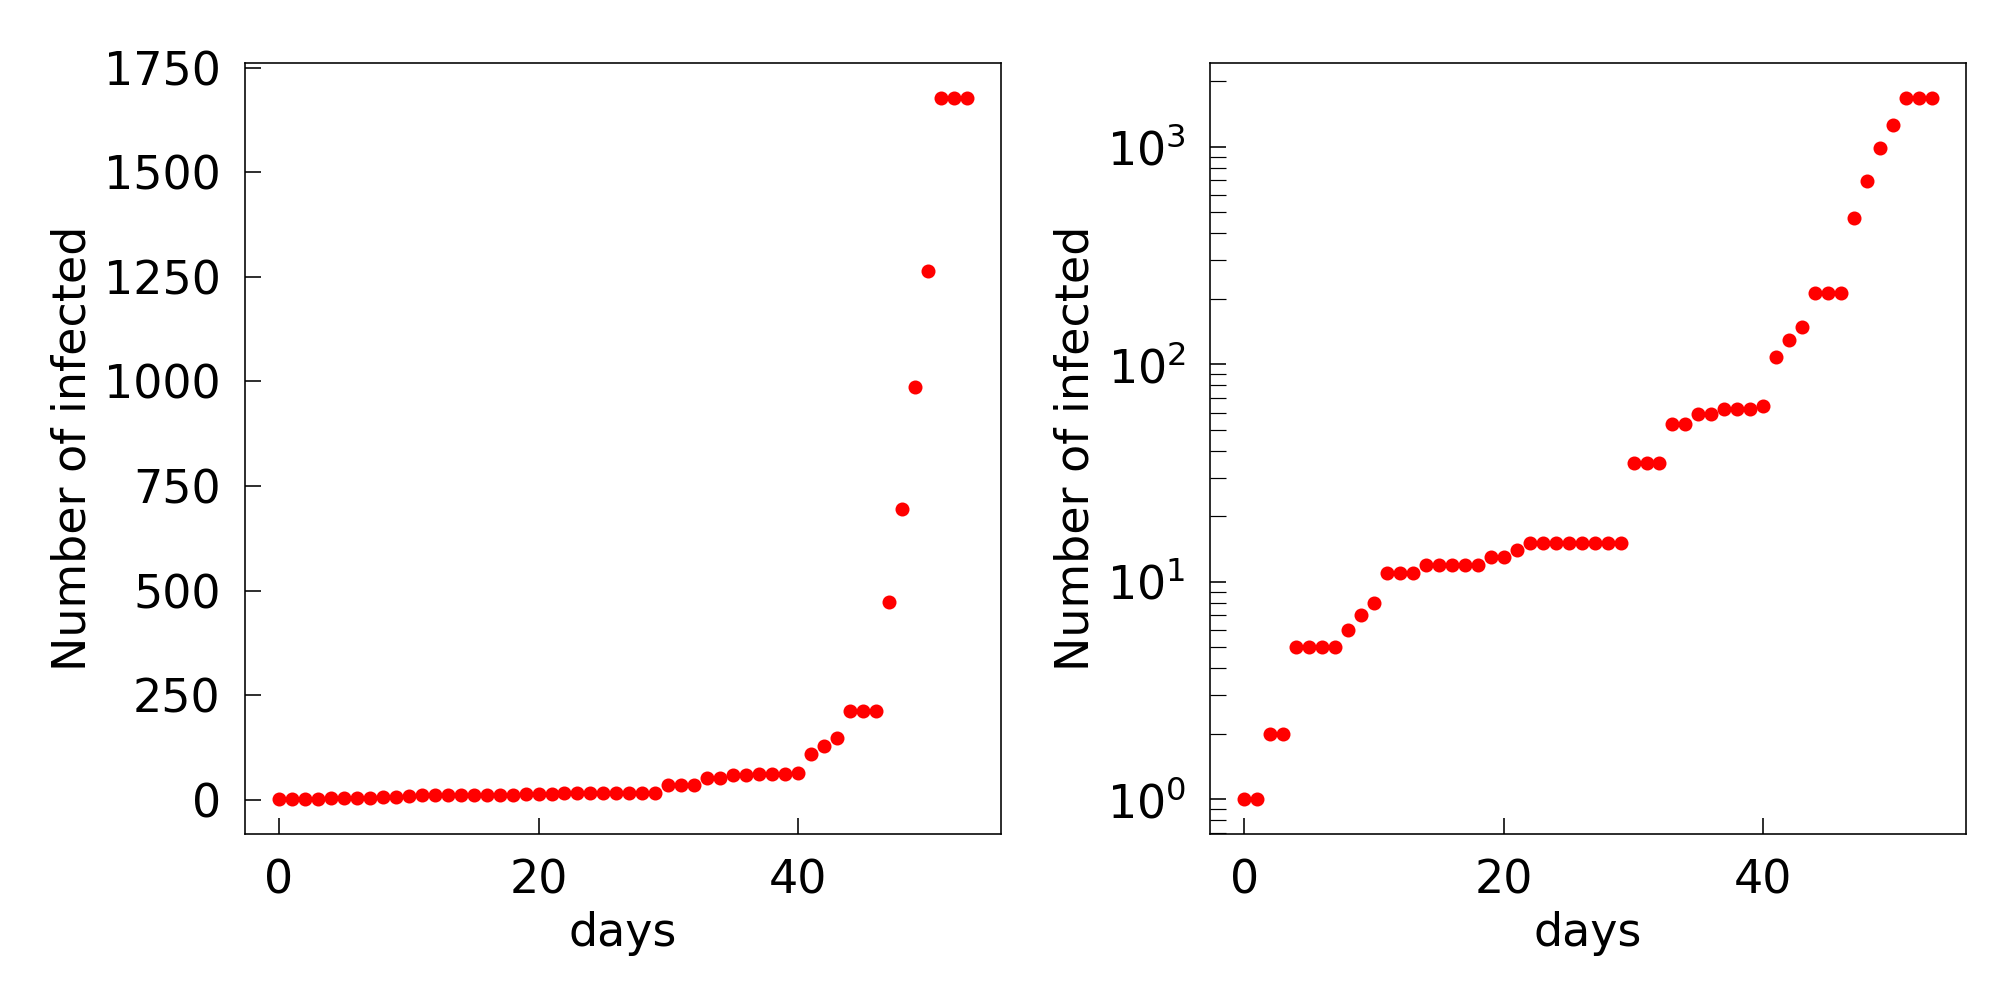

In [178]:
fig, ax = plt.subplots(ncols=2,figsize=(14,7))
ax[0].plot(list(df_corona_exp["Days"]),list(df_corona_exp["Infections"]),'ro')
ax[0].set_xlabel('days')
ax[0].set_ylabel('Number of infected')

ax[1].plot(list(df_corona_exp["Days"]),list(df_corona_exp["Infections"]),'ro')
ax[1].set_xlabel('days')
ax[1].set_ylabel('Number of infected')
ax[1].set_yscale('log')
plt.tight_layout()

In the next pair of plots I used a sliding window centered around each point with a stride of 5, to calculate the mean and the variance

<IPython.core.display.Javascript object>


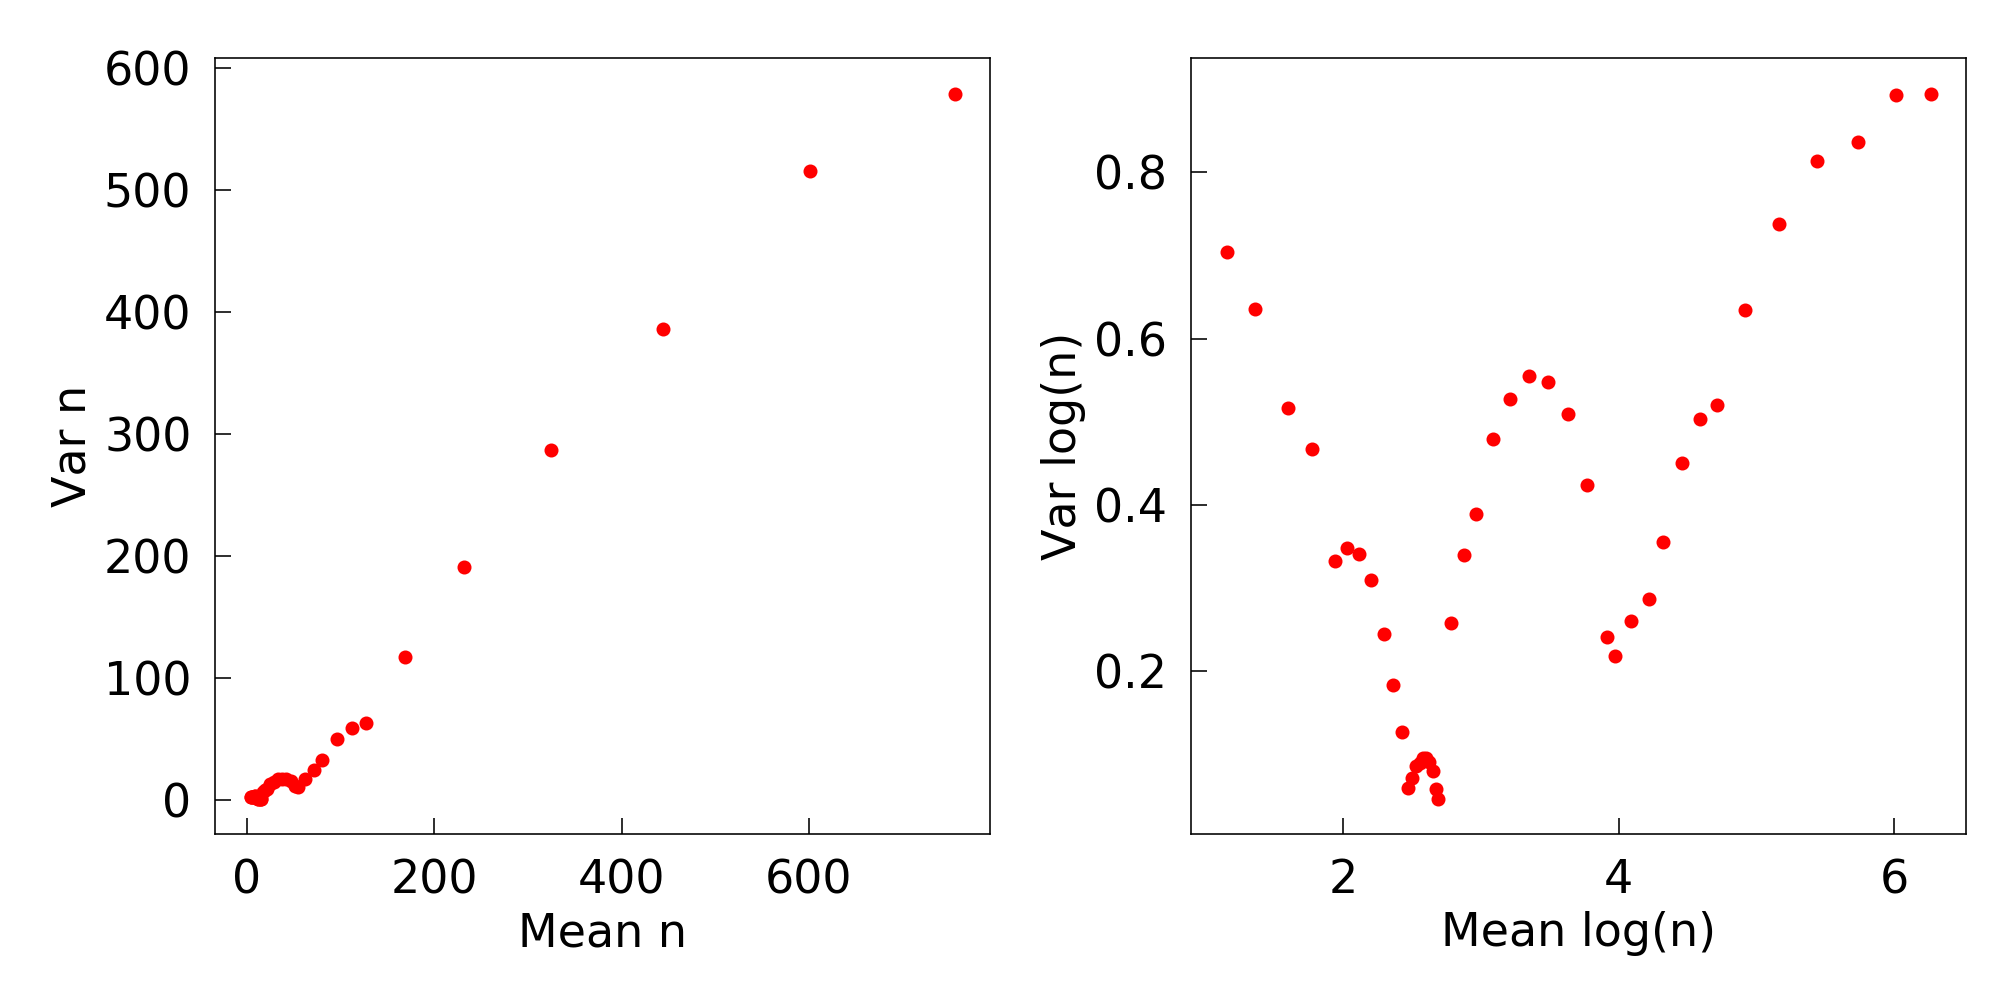

In [309]:
fig, ax = plt.subplots(ncols=2,figsize=(14,7))
interv=5
n=list(df_corona_exp["Infections"])
ax[0].plot([np.mean(n[v-interv:v+interv]) for v in range(interv,len(n)-interv,1)],[np.std(n[v-interv:v+interv]) for v in range(interv,len(n)-interv,1)],'ro')
ax[0].set_xlabel('Mean n')
ax[0].set_ylabel('Var n')


ax[1].plot([np.mean(np.log(n[v-interv:v+interv])) for v in range(interv,len(n)-interv,1)],[np.std(np.log(n[v-interv:v+interv])) for v in range(interv,len(n)-interv,1)],'ro')
ax[1].set_xlabel('Mean log(n)')
ax[1].set_ylabel('Var log(n)')

plt.tight_layout()

So here looking at the data, and with a little bit of domain knowledge we are looking at model of the kind $n(t)=n(0)e^{\beta t}$ where $\beta$ is the growth rate.  With this kind of function it seems impossible to to be able to write $\bar{n(t)}=\pmb t^T\pmb\beta$. Moreover n(t) follow by definition a Poisson statistic (number of events during an interval t), and Poisson random variable have their mean and variance equal : so homoscedasticity is not true. 


Like that it doesn't fit well with the different hypothesis we have seen before . But you can already see what kind of trick we could use to get around it. We could log transform the n. This is really different from what we were doing when transforming the covariables before. This time it really is the response variable that we are going to fit, which is transformed. We are not transforming the $\pmb X$ to increase our descriptional power of $\pmb Y$, but really transforming $\pmb Y$, and by doing so, of course transforming $\pmb X$.

In that case we end up with the following linear relationship:

$$log(n(t))=log(n(0))+\beta t$$

Looking at the relationship between the mean and the var of our newly transformed random variable log(n), we are not sure it could be considered homoscedastic but the variation are kind of small so we could try an OLS to model the log(n(t)).

In [184]:
df_corona_exp["log_infect"]=np.log(df_corona_exp["Infections"])
df_corona_exp.head()

,Infections,Days,log_infect
0,1,0,0.000000
1,1,1,0.000000
2,2,2,0.693147
3,2,3,0.693147
4,5,4,1.609438


In [240]:
import statsmodels
import statsmodels.api as sm
y=df_corona_exp["log_infect"]
X=df_corona_exp["Days"]#again making it an array 
X = sm.add_constant(X)#the model doesn't include an intercept automatically so we creat one
model = sm.OLS(y, X)# we create the least square fit object
results = model.fit()#we do the actual fit

res=results.summary()
print(res)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     510.4
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.51e-28
Time:                        13:29:55   Log-Likelihood:                -45.433
No. Observations:                  54   AIC:                             94.87
Df Residuals:                      52   BIC:                             98.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4480      0.154      2.918      0.0

<IPython.core.display.Javascript object>


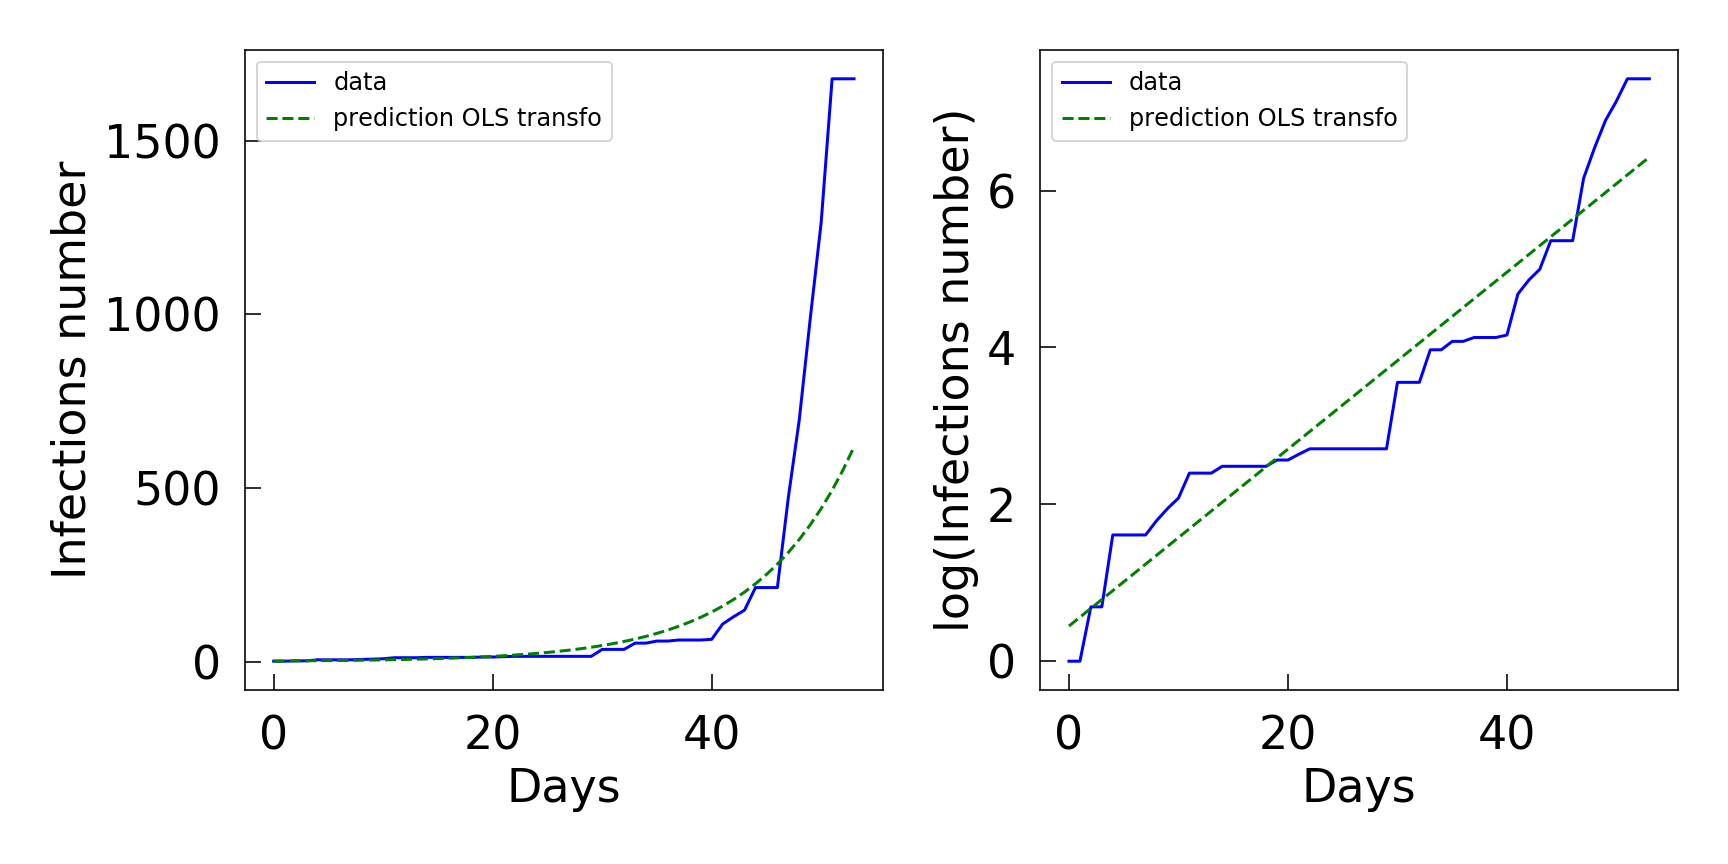

In [306]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
ax[0].plot(list(df_corona_exp["Days"]),list(df_corona_exp["Infections"]),'b-',label='data')
ax[0].plot(list(df_corona_exp["Days"]),[np.exp(0.448)*np.exp(0.1128*t) for t in list(df_corona_exp["Days"])],'g--',label='prediction OLS transfo')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Infections number')
ax[0].legend(loc='best',fontsize=12)

ax[1].plot(list(df_corona_exp["Days"]),list(df_corona_exp["log_infect"]),'b-',label='data')
ax[1].plot(list(df_corona_exp["Days"]),[0.448+0.1128*t for t in list(df_corona_exp["Days"])],'g--',label='prediction OLS transfo')

ax[1].set_xlabel('Days')
ax[1].set_ylabel('log(Infections number)')
ax[1].legend(loc='best',fontsize=12)
plt.tight_layout()

We will see later on how you just did a significant first step into GLM right now and how we could have go one step further to actually use a GLM. Because, yes, eventhough this already is quite a pretty good model, it is a nice dataset to use the more apropriate GLM than what we did so far. You will see that it will improve our prediction power at later time point, which is not great right now, and which is actually what we are more interested in.

#### Practical case 2 : Relation between the presence of  kyphosis and and a few covariates

In [208]:
df_kyphosis=pd.read_csv('kyphosis.csv')
df_kyphosis["Kyphosis_0_1"]=[1 if v=="present" else 0 for v in df_kyphosis["Kyphosis"]]
df_kyphosis.drop("Kyphosis",1,inplace=True)
df_kyphosis.head()

,Age,Number,Start,Kyphosis_0_1
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0


<IPython.core.display.Javascript object>


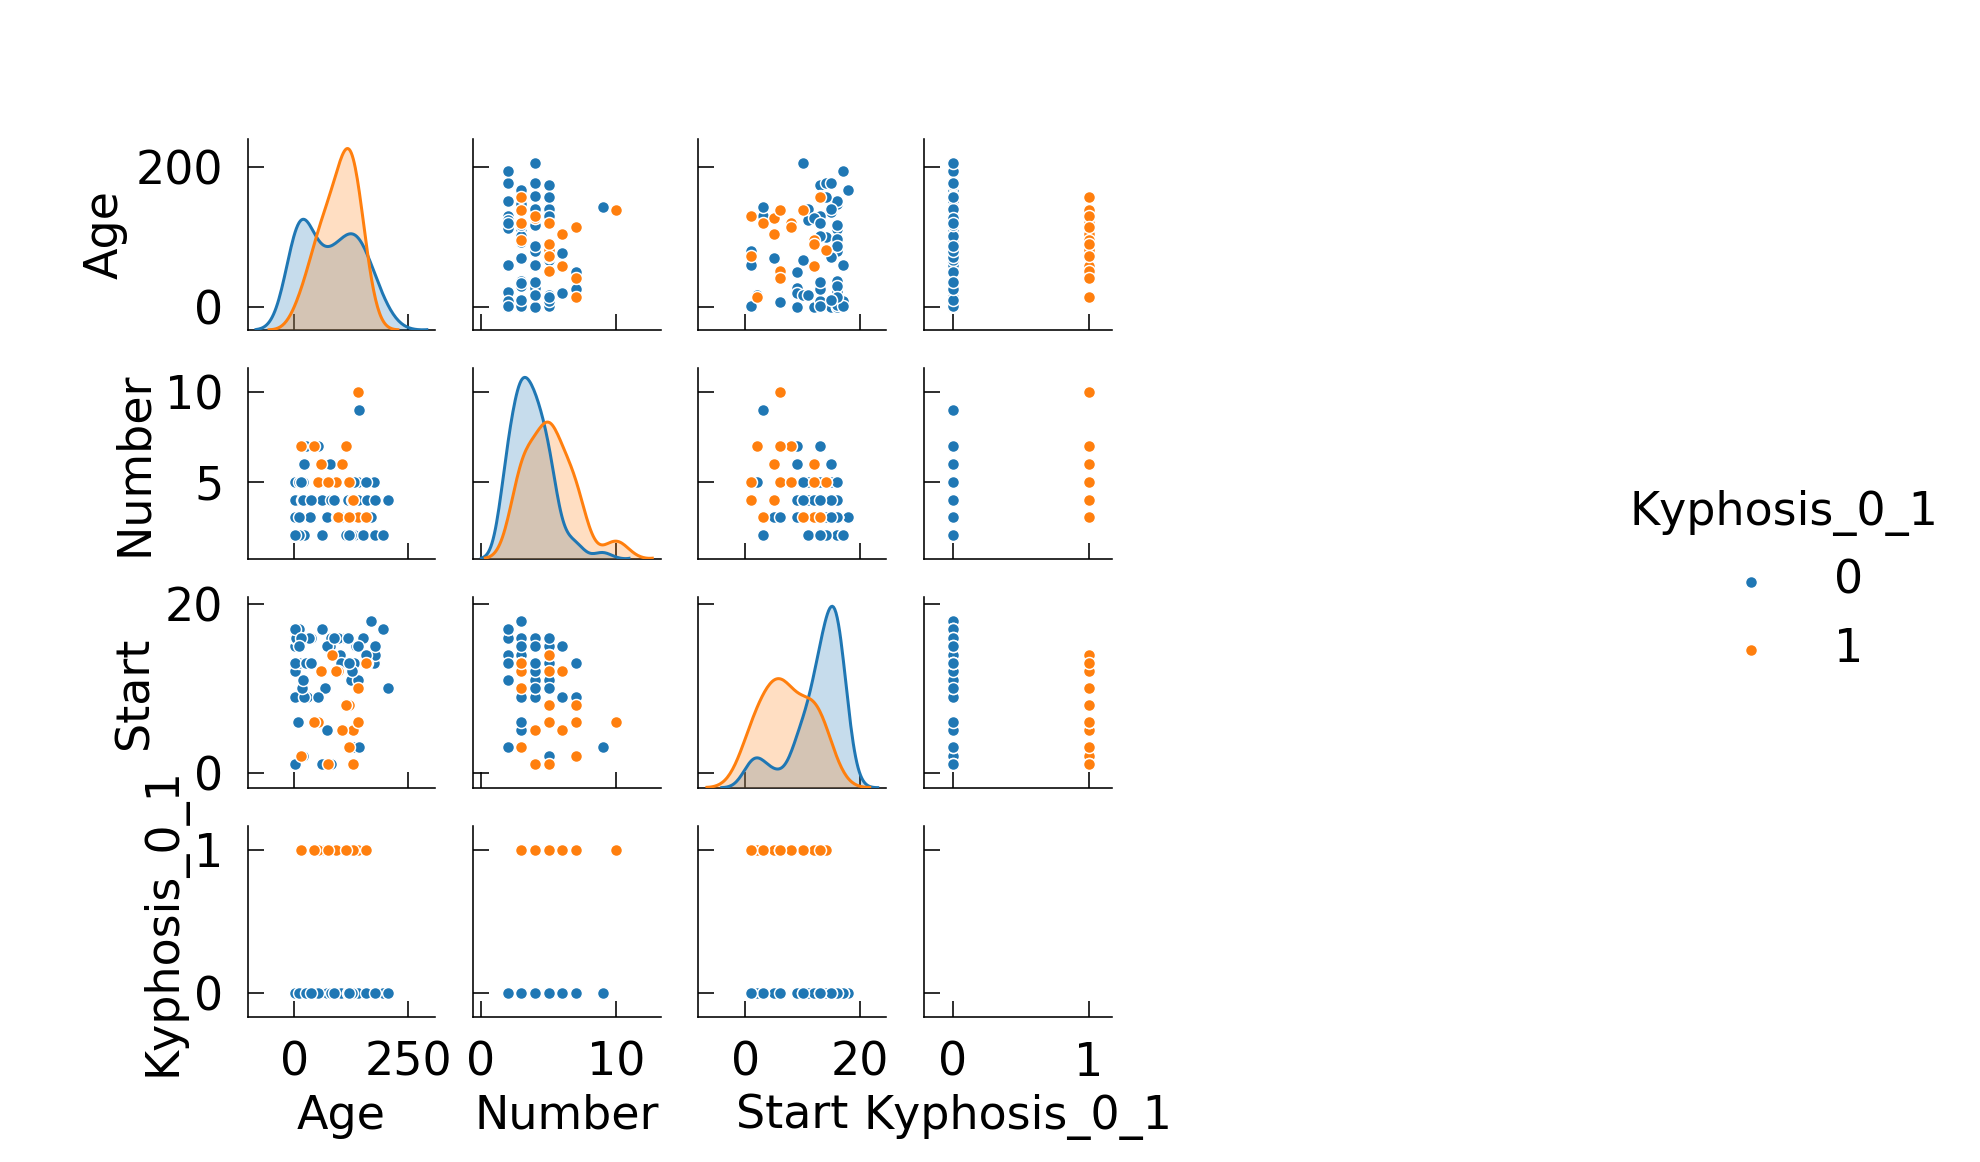

/Users/boyer0000/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


In [295]:

sns.pairplot(df_kyphosis,hue="Kyphosis_0_1",height=0.8,aspect=1)

plt.tight_layout()

Here the variable we are interested in is either 0 or 1, and could be seen as the outcome of a bernouilli experiement as it is a binary choice. So inherently you already run into a problem here : how do you write a continuous linear function that will give you values between 0 and 1 (close to zero when kyphosis is absent and close to one when kyphosis is present).... Moreover, again, since you have a bernouilli random variable your mean and your variance are dependant... How are we going to model the absence or presence of kyphosis?


Once again a way to start tackling your problem is to tranform your variable of interest, here kyphosis being present or not. Let's write p the probablity that kyphosis is present (Y=1) and thus 1-p is the probablity that kyphosis is absent (Y=0). In a bernouilli statistic this p also stand for the average of having Y=1.

The transformation we are going to look at is the log transformed of the odd ratio (why? you will understand in a few lines)

$$ln{\frac{p_i}{1-p_i}}=\beta_{0}+\Sigma^{n}_{j=1}\beta_{j}x_{j}=\pmb X^T\pmb\beta$$

which translates to

$$p_i=\frac{1}{1+e^{-(\beta_{0}+\Sigma^{n}_{j=1}\beta_{j}x_{j})}}$$

So this last equation shows you how we transformed our linear combination of covariables into an outcome between 0 and 1 that relates to the mean of a Bernouilli distribution (if you remember that before we work on relate linearly our covariable to the mean of a guassian you might see where I am going with that, if not no worries).


You can see that we change quite a lot the variable of interest, now it's p and it's not an integer just like our Kyphosis_0_1. Here more than before we drastically shift from modeling the variable to modeling its mean. Also we can not straight away from Kyphosis_0_1 to p (but at least I can show you why it doesn't work). We already know that our variable is coming from a bernouilli experiment. So a good approach would be to fit a bernouilli distribution with parameter (mean) $p_i=\frac{1}{1+e^{-(\beta_{0}+\Sigma^{n}_{j=1}\beta_{j}x_{j})}}$, along the curve of our data (juste like what we did for the maximum likelihood with gaussian noise).

As you will see this is exactly what GLM does



First let's see how using OLS here makes no sense

In [254]:
import statsmodels
import statsmodels.api as sm
y=df_kyphosis["Kyphosis_0_1"]
X=df_kyphosis[["Age","Number","Start"]]#again making it an array 
X = sm.add_constant(X)#the model doesn't include an intercept automatically so we creat one
model = sm.OLS(y, X)# we create the least square fit object
results = model.fit()#we do the actual fit

res=results.summary()
print(res)

                            OLS Regression Results                            
Dep. Variable:           Kyphosis_0_1   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     8.900
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           3.91e-05
Time:                        13:42:15   Log-Likelihood:                -30.107
No. Observations:                  81   AIC:                             68.21
Df Residuals:                      77   BIC:                             77.79
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2612      0.193      1.351      0.1

/Users/boyer0000/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<IPython.core.display.Javascript object>


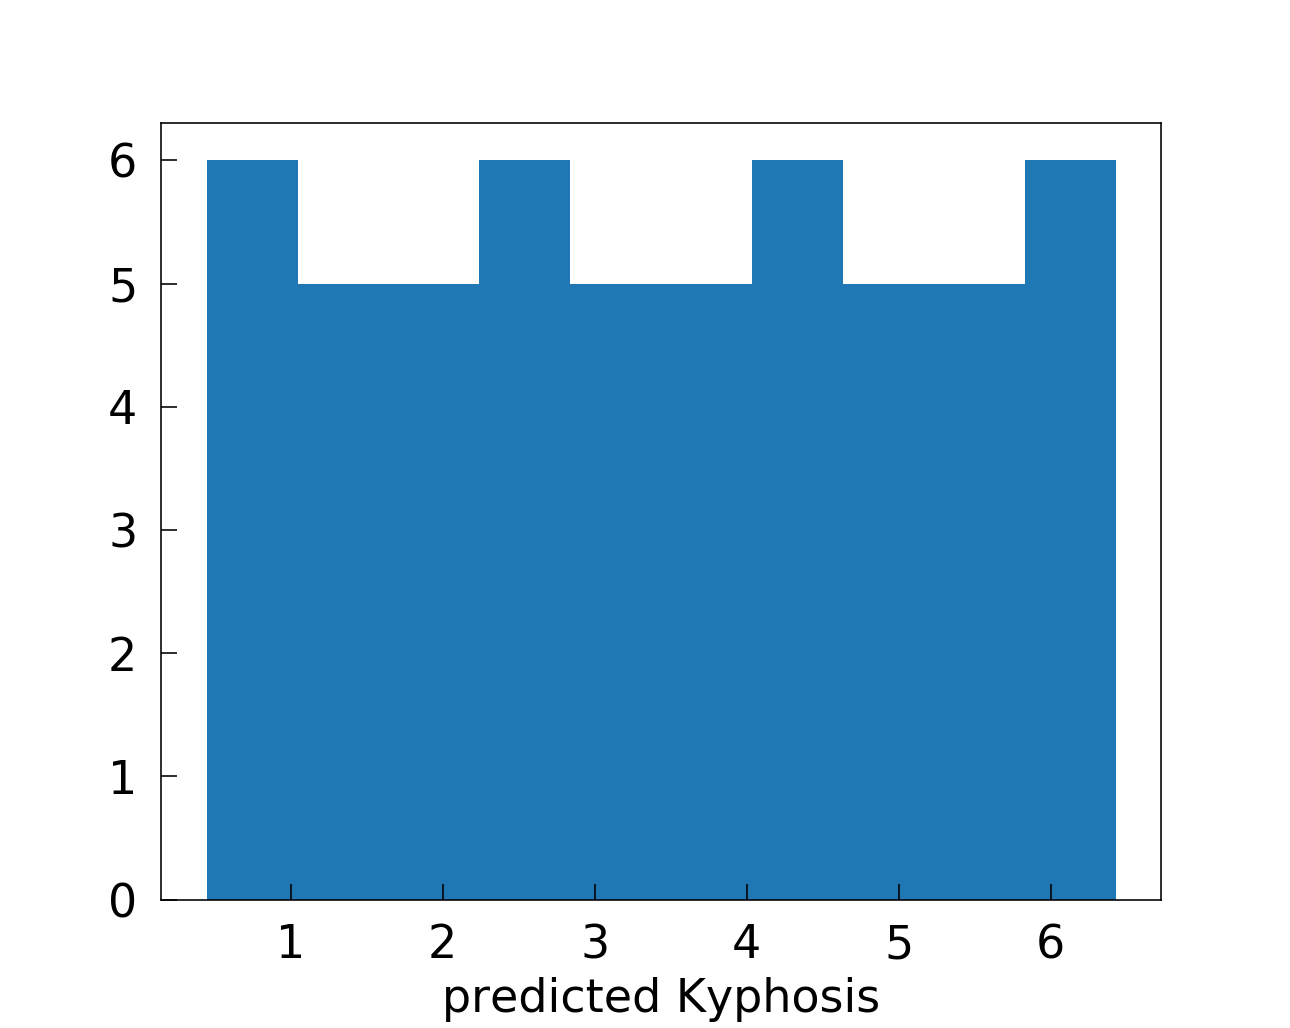

Text(0.5, 0, 'predicted Kyphosis')

In [247]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(list(results.fittedvalues),10)
ax.set_xlabel("predicted Kyphosis")


Those are some irrational values for Kyphosis_1_0

### Let's define what is the modeling process behind GLM

If you remember, to use our Maximum Likelihood Estimator method, we spent a lot of time before saying that we were looking to solve a very specific kind of problem : one where we wanted to fit the mean of $\pmb Y_i$ knowing some value $\pmb X_i$ , and that there was some gaussian noise ($\pmb\mu=0$,$\sigma^2\mathbb{1}=\sigma^2$ to simplify the notation and to emphasize that there is homoscedasticity and no covariance)(still the notation are confusing here... ineed to investigate) around the mean of $\pmb Y_i$.

In mathematical term we were modeling our problem with the following distribution:

$$P(\pmb Y_i|\pmb X_i)=\mathcal{N}(\pmb X_i^{T}\pmb\beta,\sigma^2)$$

On which we were using Maximum Likelihood Estimation 

Thus so far, we have restricted ourselves to purely straightforward linear relations between the mean of $\pmb Y_i$ conditional to $\pmb X_i$ i.e.:

$$\mu(\pmb X_i)=\mathbb{E}(\pmb Y_i|\pmb X_i)=(\pmb X_i^{T}\pmb\beta)$$

We have also only looked at case where the noise was normaly distributed : hence the $\mathcal{N}$ above. 

Under some conditions (i.e your random component is part of the exponential distribution family) you can relax those conditions.

Remember, as we want to use linear models the only thing we can not change is our fitting using $\pmb X_i^{T}\pmb\beta$. But this linear relationship doesn't ahve to apply to the conditional mean $\mu(\pmb X_i)$ but instead to a function of that conditional mean:

$$g(\mu(\pmb X_i))=\pmb X_i^{T}\pmb\beta$$

g is called the link function, and we wil investigate a little bit more what it can be and why it is usefull. 


Or we could also look at more general distribution to model our the noise induced by the interaction between our $\pmb Y_i$ and $\pmb X_i$:

$$P(\pmb Y_i|\pmb X_i)=\mathcal{D}(g^{-1}(\pmb X_i^{T}\pmb\beta),\sigma^2)$$

Where $\mathcal{D}$ is a distribution that make sense to model our $\pmb Y$ random variable, and $g^{-1}$ the inverse of the link function.

And one top of that we could still work with our Maximum Likelihood Estimator method.



**So in our first example about exponential growth of Covid cases GLM would have perfom a maximum likelihood on the following distribution:**

$$P(n(t)|t)=\mathcal{P}(n(0)e^{\delta t})$$

Which is a poisson distribution ($\mathcal{P}$) with mean $n(t)=n(0)e^{\delta t}$, where you should recognize the function $g^{-1}:\pmb t^{T}\pmb\beta\rightarrow n(0)e^{\beta t}$, or $g:n(t) \rightarrow log(n(0))+\delta t$


**In our second example about kyphosis GLM would also simply perform maximum likelihood on the following distribution:**


$$P(\pmb K_i|\pmb X_i)=\mathcal{B}(\frac{1}{1+e^{-(\beta_{0}+\Sigma^{n}_{j=1}\beta_{j}x_{j})}})$$

#### Let's implement our max likelihood and see how stats model can do the same for us

In [258]:
df_corona_exp.keys()

Index(['Infections', 'Days', 'log_infect'], dtype='object')

In [279]:
import scipy as sc

def log_poisson_distri(x,lambda_):
    try:
        result=np.log(lambda_)*x-lambda_-np.log(np.math.factorial(x))
    except:
        result=np.log(lambda_)*x-lambda_-(x*np.log(x)-x)
    return result


def maxlikelihood1(para,list_x,list_t):
    su=0
    #print(para)
    for x,t in zip(list_x,list_t):
        lambda_=para[0]*np.exp(para[1]*t)
        #print(lambda_)
        su+=log_poisson_distri(x,lambda_)
    return -su


p1_1=sc.optimize.fmin(maxlikelihood1,[1,1],args=(list(df_corona_exp["Infections"]),list(df_corona_exp["Days"]),),full_output=True)

Optimization terminated successfully.
         Current function value: 771.284279
         Iterations: 88
         Function evaluations: 164


In [294]:
print('Initial count: ',p1_1[0][0],'    Growth rate:',p1_1[0][1])

Initial count:  0.06798165172913803     Growth rate: 0.19227434096661228


In [268]:
import statsmodels
import statsmodels.api as sm
y=df_corona_exp["Infections"]
X=df_corona_exp["Days"]#again making it an array 
X = sm.add_constant(X)#the model doesn't include an intercept automatically so we creat one
model = sm.GLM(y, X, family=sm.families.Poisson())# we create the least square fit object
results = model.fit()#we do the actual fit

res=results.summary()
print(res)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Infections   No. Observations:                   54
Model:                            GLM   Df Residuals:                       52
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -854.83
Date:                Tue, 20 Oct 2020   Deviance:                       1423.8
Time:                        15:31:32   Pearson chi2:                 2.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6891      0.092    -29.212      0.0

As a side note, in this summary, you don't see those F-statistic and t-test reports. Of course, since the noise is not normally distributed anymore.

Instead of the t- statistic you get a z static. This z statistics is comming from a Wald test, with the null hypothesis being that the estimate is 0. This Wald test uses the curvature of the log-likelihood for it to be computed and the confidence interval on the estimators as well as it's standard error, are also derived from this curvature.

You might have also notice that there is no $\pmb R^2$ anymore. Instead you have the concept of deviance. It is a way to generalize the concept of $\pmb R^2$ and could be sumurized as the log likelihood ratio ($2*(l(X;\hat{\pmb\beta})-l(X;\hat{\beta}_{0}))$) with a null model only having an intercept ( in the $\pmb R^2$ we were also comparing the explanatory capability of our model to a null model with only an intercept).

Finally the Pearson chi2 is not important here as it is a test relevant only when your response variable is categorical.



<IPython.core.display.Javascript object>


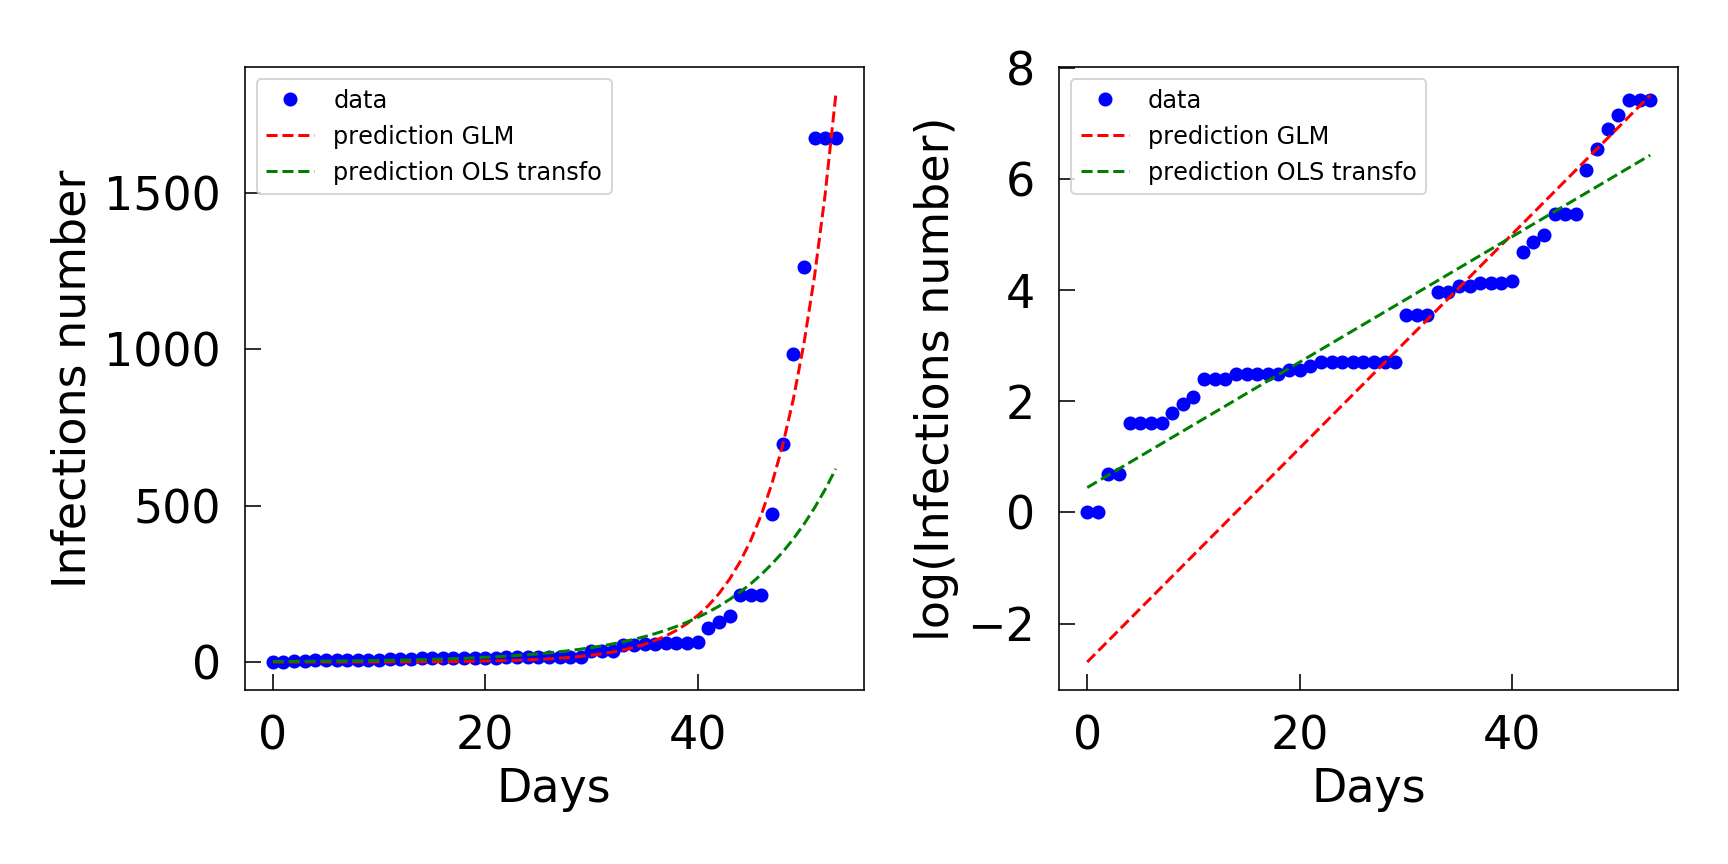

In [308]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
ax[0].plot(list(df_corona_exp["Days"]),list(df_corona_exp["Infections"]),'bo',label='data')
ax[0].plot(list(df_corona_exp["Days"]),[np.exp(-2.6891)*np.exp(0.1923*t) for t in list(df_corona_exp["Days"])],'r--',label='prediction GLM')
ax[0].plot(list(df_corona_exp["Days"]),[np.exp(0.448)*np.exp(0.1128*t) for t in list(df_corona_exp["Days"])],'g--',label='prediction OLS transfo')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Infections number')
ax[0].legend(loc='best',fontsize=12)

ax[1].plot(list(df_corona_exp["Days"]),list(df_corona_exp["log_infect"]),'bo',label='data')
ax[1].plot(list(df_corona_exp["Days"]),[-2.6891+0.1923*t for t in list(df_corona_exp["Days"])],'r--',label='prediction GLM')
ax[1].plot(list(df_corona_exp["Days"]),[0.448+0.1128*t for t in list(df_corona_exp["Days"])],'g--',label='prediction OLS transfo')

ax[1].set_xlabel('Days')
ax[1].set_ylabel('log(Infections number)')
ax[1].legend(loc='best',fontsize=12)
plt.tight_layout()

Our new model, taking into account the Poisson statistic of our response variable is doing way better (mainly in the important exponential phase)!!!

In [290]:
y=df_kyphosis["Kyphosis_0_1"]
X=df_kyphosis[["Age","Number","Start"]]#again making it an array 
X = sm.add_constant(X)#the model doesn't include an intercept automatically so we creat one
model = sm.GLM(y, X,family=sm.families.Binomial())# we create the least square fit object
results = model.fit()#we do the actual fit

res=results.summary()
print(res)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Kyphosis_0_1   No. Observations:                   81
Model:                            GLM   Df Residuals:                       77
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30.690
Date:                Tue, 20 Oct 2020   Deviance:                       61.380
Time:                        16:25:22   Pearson chi2:                     70.3
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0369      1.450     -1.405      0.1

A few words about Pearson chi square here or is it too much?

<IPython.core.display.Javascript object>


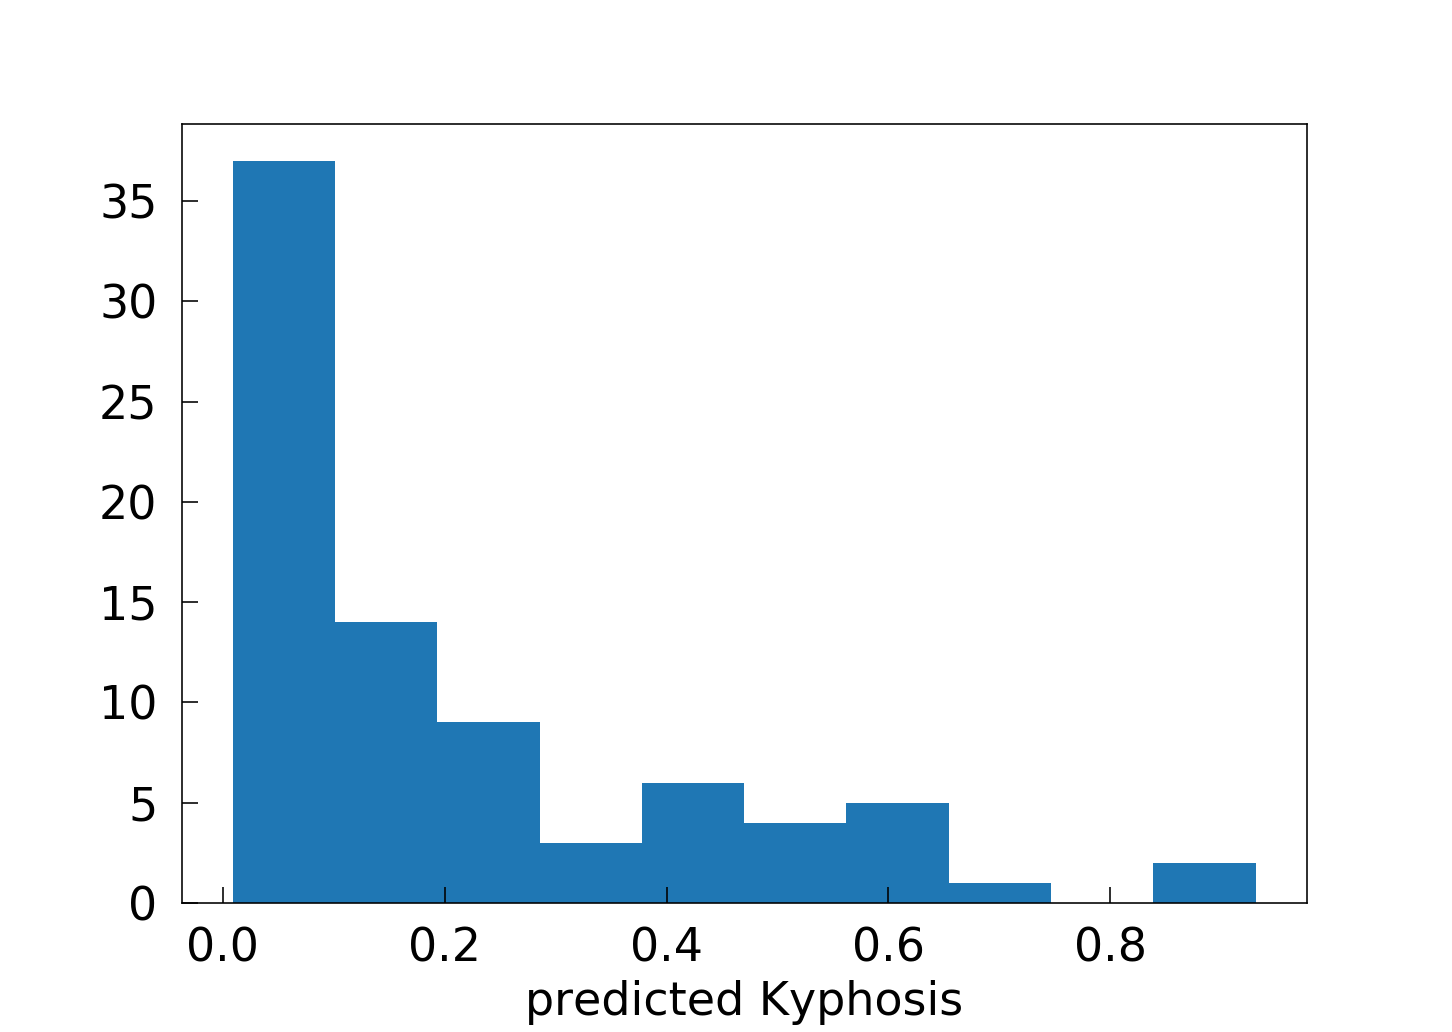

Text(0.5, 0, 'predicted Kyphosis')

In [291]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(list(results.fittedvalues),10)
ax.set_xlabel("predicted Kyphosis")

For each patient we have now a probability that this patient will develop Kyphosis. From here we can put a threshold that will tip our decision to **classify** our patient as prone to develop Kyphosis or not.

Notice the use of the word classify. Classification is a notion that we will develop next, from a machine learning perspective. But remember that in that particular case called classification by logistic regression, under the hood the problem is still a problem of regression through a  modelisation using Generalised Linear Model.

We will spend some time introducing key concepts of the classical machine learning framework, first through classification, involving or not under the hood a regression, or even regression in the framework of machine learning.


# Exo GLM : dose response?